# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Modles

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
from helpers.parallel_helper import *
load_libs()

## 1.2 Read Data

In [2]:
# ipath= "./data/NCDC/us/baltimore/dat.txt" # time too short

# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # 4?
# ipath= './data/NCDC/uk/middle_wallop/dat.txt' # good
# ipath= './data/NCDC/uk/southhamption/dat.txt'
# ipath= './data/NCDC/uk/bournemouth/dat.txt'
# ipath= './data/NCDC/uk/tiree/dat.txt'  # try 4
# ipath= "./data/NCDC/uk/bealach_na_ba/dat.txt" # 
# ipath= "./data/NCDC/uk/skye_lusa/dat.txt" # 
# ipath= "./data/NCDC/uk/south_uist_range/dat.txt" 
ipath= './data/NCDC/uk/marham/dat.txt' 
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?

# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # 2010-2014 has problem
# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # 4 or 5?
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # 
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good

# ipath= "./data/NCDC/canada/melita_man/dat.txt" # 
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt" # uptail wind speed 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/argentia/dat.txt" 

# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good, can try 4
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak, initial speed (should be good with m/s)
# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4, initial speed (should be good with m/s)
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; very good
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer with less data, use m/s
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # some directions are blocked

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" # high initial speed
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high initial speed
# ipath= "./data/NCDC/oceania/auckland_intl/dat.txt"  # Weird KDE shape, 4?

# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= "./data/NCDC/cn/binhai/dat.txt" # recent 5 year has small problem, good overall, few 0
# ipath= "./data/NCDC/cn/luogang/dat.txt" # recent 5 year has small problem, good overall, few 0
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" 
# ipath= "./data/NCDC/cn/zhengding/dat.txt" 
# ipath= "./data/NCDC/cn/tianjing/dat.txt" # 16 sectors
# ipath= "./data/NCDC/cn/gushi/dat.txt" # 16 sectors, fit not very good
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" # data is not long enough
# ipath= "./data/NCDC/cn/wuxu/dat.txt" # recent 5 year has problem
# ipath= './data/NCDC/cn/macau/dat.txt'  
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # few initial data

# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted

# ipath= "./data/cn_database/广州.txt" 
# ipath= "./data/cn_database/北京.txt" 

uipath = unicode(ipath , "utf8")

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
else:
    df = read_cn_database(uipath)

In [3]:
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 19700000) & (date < 20160000) ")

/Users/cqcn1991/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


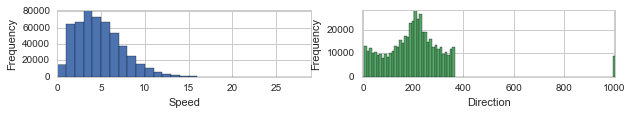

In [4]:
plot_speed_and_angle_distribution(df.speed, df.dir)

In [5]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
df['month'] = df['date']%10000//100
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
df.describe()

date           HrMn            dir          speed  \
count  5.202390e+05  520239.000000  520239.000000  520239.000000   
mean   1.997604e+07    1162.911320     204.792568       4.676251   
std    1.216686e+05     689.345107     140.391450       2.749027   
min    1.973010e+07       0.000000       0.000000       0.000000   
25%    1.988123e+07     600.000000     120.000000       2.600000   
50%    2.000050e+07    1150.000000     210.000000       4.100000   
75%    2.008083e+07    1750.000000     260.000000       6.200000   
max    2.015123e+07    2355.000000     999.000000      28.300000   

               month   dir_windrose  
count  520239.000000  520239.000000  
mean        6.523498     198.541518  
std         3.449581     141.290864  
min         1.000000       0.000000  
25%         4.000000     120.000000  
50%         7.000000     200.000000  
75%        10.000000     260.000000  
max        12.000000     999.000000

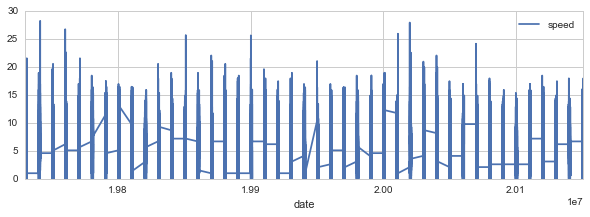

In [6]:
df.plot(x='date', y='speed',legend=True,figsize=(10,3))

### 1.2.1 Unit Detection

True


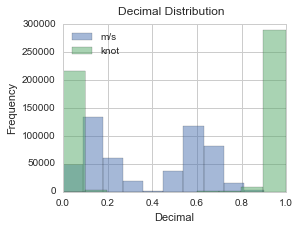

In [7]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))
knot_unit = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False

# knot_unit = False

if knot_unit:
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    df['speed'] = df['speed'].apply(lambda x: int(round(x)))
plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')

print(knot_unit)

### 1.2.2 Sampling Type Selection

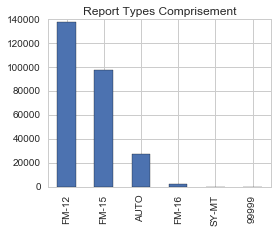

In [8]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.2.3 Sampling Time Selection

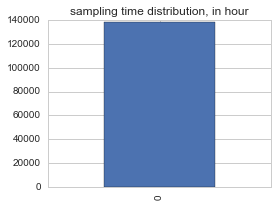

In [9]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution, in hour', figsize=(4,3))

# Need more elaboration
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# sample_times =  [sample_times.index[0]]
df = df.query("sample_time in @sample_times")
df.drop(['sample_time'], 1,inplace=True)

In [10]:
df['HrMn'].value_counts().sort_index()

0       12705
100     12963
200     12940
300     12889
400     12998
500     12941
600     12556
700     12920
800     12974
900     12917
1000    12969
1100    12981
1200    12556
1300    12934
1400    12935
1500    12854
1600    12991
1700    13048
1800    12681
1900    13086
2000    13141
2100    13054
2200    13161
2300    13035
Name: HrMn, dtype: int64

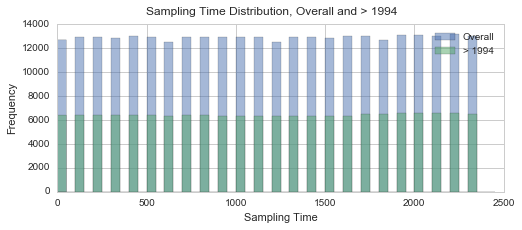

In [11]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2
bins=arange(0, 2400+100, 50)

df['HrMn'].plot(kind='hist', alpha=0.5,bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

## 1.3 Data Wrangling

### 1.3.1 Artefacts

#### 1.3.1.1 wrong direction record

In [12]:
display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, month, dir_windrose, decimal]
Index: []

#### 1.3.1.2 sudden increase in speed

date  HrMn   type  dir  speed wind_type  month  dir_windrose  \
15938   19741212  1000  FM-12  290     55         N     12           160   
285646  20020128  1700  FM-12  210     54         N      1           240   
24825   19760102  2300  FM-12  180     52         N      1           270   
284448  20011228  1400  FM-12  170     51         N     12           280   
102953  19851113   900  FM-12  230     50         N     11           220   
362221  20070118  1300  FM-12  180     47         N      1           270   
24826   19760103     0  FM-12  180     46         N      1           270   
27695   19760504   500  FM-12  220     44         N      5           230   
296516  20021027  1000  FM-12  200     44         N     10           250   
24824   19760102  2200  FM-12  210     44         N      1           240   

         decimal  incre  incre_reverse  
15938   0.010814   44.0           46.0  
285646  0.427660   27.0           27.0  
24825   0.095046    8.0            6.0  
284448  0.539970   25.0           30.0  
102953  0.956817   40.0           45.0  
362221  0.041049   17.0            4.0  
24826   0.069127   -6.0            7.0  
27695   0.125281   30.0           31.0  
296516  0.930897   10.0           32.0  
24824   0.125281   13.0           -8.0

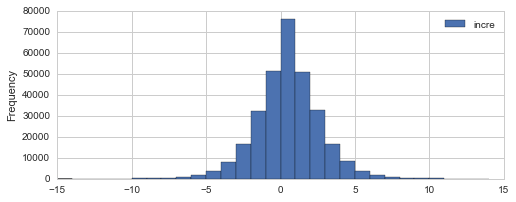

In [13]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [14]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

('sudden increase number', 11)


After Simple Aretefacts Handling

In [15]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

date  HrMn   type  dir  speed wind_type  month  dir_windrose  \
24825   19760102  2300  FM-12  180     52         N      1           270   
362221  20070118  1300  FM-12  180     47         N      1           270   
24826   19760103     0  FM-12  180     46         N      1           270   
24824   19760102  2200  FM-12  210     44         N      1           240   
296516  20021027  1000  FM-12  200     44         N     10           250   
144090  19900226   700  FM-12  220     43         N      2           230   
318234  20040320  1600  FM-12  200     43         N      3           250   
362224  20070118  1500  FM-12  180     43         N      1           270   
41815   19771224   900  FM-12  210     42         N     12           240   
303829  20030427  1200  FM-12  200     41         N      4           250   

         decimal  incre  incre_reverse  
24825   0.095046    8.0            6.0  
362221  0.041049   17.0            4.0  
24826   0.069127   -6.0            7.0  
24824   0.125281   13.0           -8.0  
296516  0.930897   10.0           32.0  
144090  0.958975   20.0           18.0  
318234  0.958975    3.0            8.0  
362224  0.958975   -4.0            3.0  
41815   0.987052   18.0           20.0  
303829  0.820745   22.0           17.0

### 1.3.2 Direction re-aligment and 999
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [16]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
SECTOR_LENGTH = 360/len(effective_column)
print(len(effective_column), SECTOR_LENGTH)

0       5760
10      4485
20      5803
30      5567
40      6386
50      6190
60      7641
70      6708
80      7969
90      7382
100     7146
110     5448
120     6307
130     5778
140     7756
150     6998
160     8095
170     7453
180     9699
190     8555
200    11358
210    11153
220    15825
230    14196
240    16790
250    13790
260    13599
270    10109
280    10306
290     8642
300     9475
310     7552
320     8079
330     6511
340     6167
350     4837
999     4700
Name: dir, dtype: int64

(36, 10.0)


In [17]:
df=realign_direction(df, effective_column)

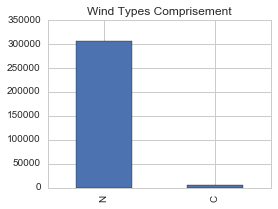

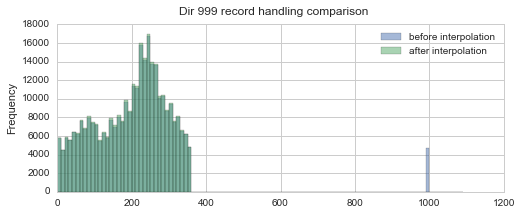

In [18]:
df=fill_direction_999(df, SECTOR_LENGTH)

### 1.3.3 Time Shift Comparison

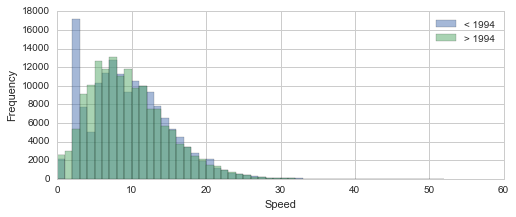

In [19]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

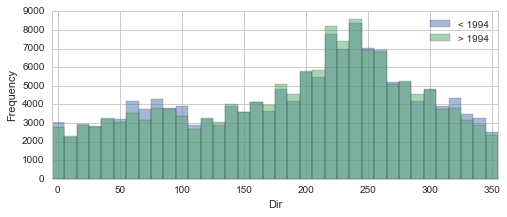

In [20]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3),tight='x')

1973 - 1974


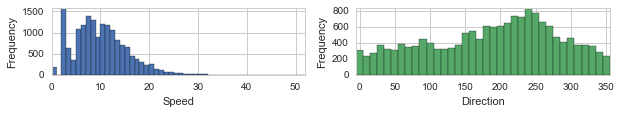

1975 - 1979


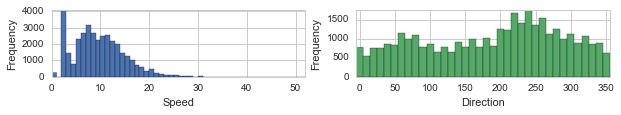

1980 - 1984


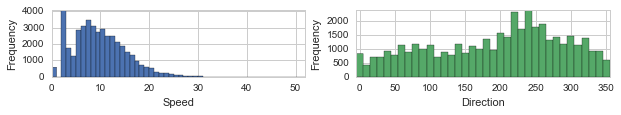

1985 - 1989


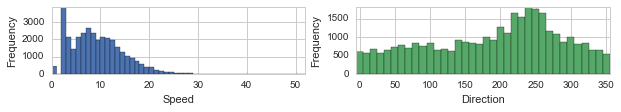

1990 - 1994


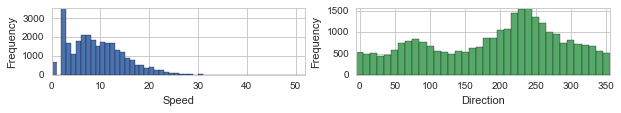

1995 - 1999


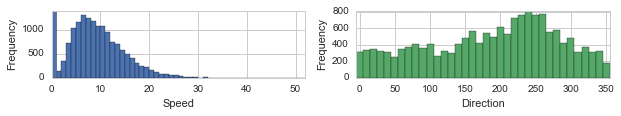

2000 - 2004


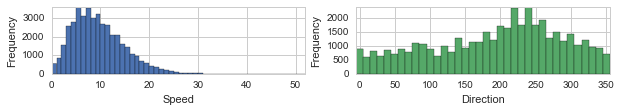

2005 - 2009


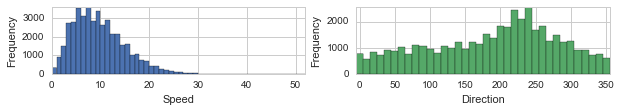

2010 - 2014


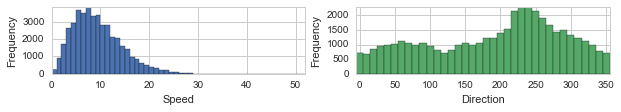

2015 - 2015


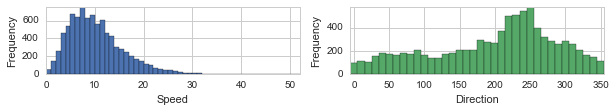

In [21]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df)

### 1.3.4 0 Speed

In [22]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

(False, 0.0064634210113475917)


## 1.4 Re-distribute Direction and Speed
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

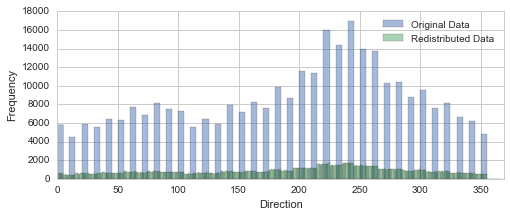

In [23]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

Redistribute upward, e.g. 0 -> [0,1]


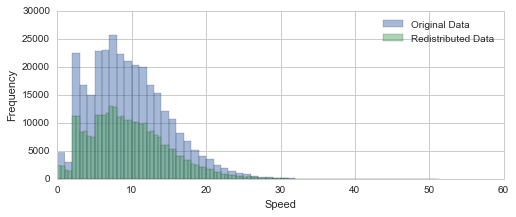

In [24]:
if delete_zero:
    redistribute_method = 'round_down'
else:
    redistribute_method = 'round_up'
df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.5 Generate (x,y) from (speed,dir)

In [25]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [26]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Configs

## 2.1 Data Overview

In [27]:
## Summery of the data selection
print 'Knot unit?', knot_unit
print 'Incre_threshold for artefact detection:', incre_threshold
print 'Report type used:', report_type_most_used
print 'Sampling time used:', sample_times
print 'delete_zero?', delete_zero
if 'speed_redistribution_info' in globals():
    print 'Speed redistribution info:', speed_redistribution_info 

df_all_years = df # for later across-year comparison
df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? True
Incre_threshold for artefact detection: 20
Report type used: FM-12
Sampling time used: [0]
delete_zero? False
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


date          HrMn           dir         speed         month  \
count  4.362700e+04  43627.000000  43627.000000  43627.000000  43627.000000   
mean   2.012063e+07   1149.480826    191.370942      9.425952      6.518395   
std    1.413450e+04    692.216184     95.086959      5.024182      3.449679   
min    2.010010e+07      0.000000     -4.999608      0.000690      1.000000   
25%    2.011040e+07    500.000000    111.477455      5.667186      4.000000   
50%    2.012063e+07   1100.000000    212.964751      8.684851      7.000000   
75%    2.013093e+07   1700.000000    264.103601     12.384431     10.000000   
max    2.014123e+07   2300.000000    354.980805     36.441763     12.000000   

       dir_windrose       decimal         incre  incre_reverse             x  \
count  43627.000000  43627.000000  43627.000000   43627.000000  43627.000000   
mean     185.404153      0.552947      0.000115      -0.000183     -1.735577   
std      111.541762      0.448819      2.107824       2.107841      6.972487   
min        0.000000      0.000000    -15.000000     -18.000000    -35.066223   
25%      120.000000      0.053997     -1.000000      -1.000000     -6.477644   
50%      190.000000      0.913609      0.000000       0.000000     -1.173104   
75%      250.000000      0.967607      1.000000       1.000000      3.218970   
max      999.000000      0.997842     18.000000      15.000000     21.344453   

                  y  
count  43627.000000  
mean      -2.091224  
std        7.621799  
min      -33.915295  
25%       -7.208829  
50%       -2.348065  
75%        3.459956  
max       26.441101

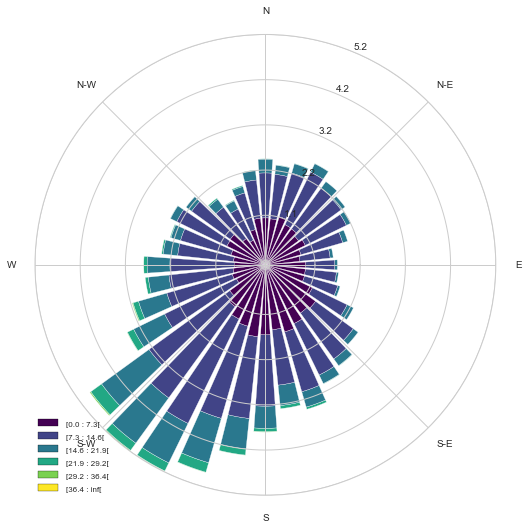

In [28]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [29]:
ax, _params = WindAxes.from_ax().pdf(df.speed, bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF')

fig,ax = plt.subplots()
ecdf = sm.distributions.ECDF(df.speed)
x = linspace(0, df.speed.max())
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label='ECDF')

k_shape, lamb_scale = weibull_params[1], weibull_params[3]
y=1-exp(-(x/lamb_scale)**k_shape) # cdf
plot(log(x), log(-log(1-y)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'},figsize=(4,3))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARwAAADZCAYAAADypo9TAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlcFYX+//HXOeyL4IqaCyIqrth1L3Mp0rSyQsHE/Xep
bmb3a/4qFbXcl7p+780MSsufXqmuZlIumW1K3qxkCRBJUBFREVnEBVAUDvP7gzhCKnCQOXM4fJ6P
hw8PZ5nPZzI/zsyZeY9OURQFIYQwA73WDQghGg4ZOEIIs5GBI4QwGxk4QgizkYEjhDAbGThCCLOx
VXPhiqKwePFiUlJSsLe3Z8WKFbRr1874+v79+wkLC8PW1pZx48YRGBjIzZs3CQkJ4dy5c7i6urJo
0SLat2+vZptCCDNRdeB8//333Lx5k61bt5KQkMCqVasICwsDoKSkhNWrVxMREYGDgwNBQUH4+fnx
9ddf4+LiwrZt20hLS2PJkiVs3LhRzTaFEGai6sCJjY1lyJAhAPTu3ZujR48aX0tNTcXT0xNXV1cA
+vXrR1RUFCdPnmTo0KEAeHl5cerUKTVbFEKYkarHcAoKCmjUqJHxZ1tbW0pLS+/4mrOzMwUFBXTv
3p3IyEgA4uPjyc7ORk6GFsI6qLqF4+rqSmFhofHn0tJS9Hq98bWCggLja4WFhbi5ueHn58fJkyeZ
NGkSffr0oUePHuh0uirrxMbGqrMCQohq9e3bt8bvVXXg9OnThwMHDjBq1Cji4+Pp0qWL8TVvb2/S
09O5evUqjo6OxMTEEBwcTGJiIg888AAhISEcPXqU8+fP16iWKSt9r2JjY6VePawl9dSpZwpVB86I
ESM4dOgQEyZMAGDVqlXs2bOH69evExgYSEhICH/9619RFIWAgAA8PDyws7Nj7dq1fPDBB7i5ubFi
xQo1W1SdwWAgNTW10nPe3t7Y2Nho1JEQ2lF14Oh0OpYsWVLpOS8vL+Pj4cOHM3z48EqvN2nShE2b
NqnZllmlpqbi45MGlK93GikpVNraE6KhUHXgiHJegAwYIeRMYyGE2cjAEUKYjQwcIYTZyMARQpiN
DBwhhNnIt1S1YDAYOH78uPFnOa9GiJqRgVML586dY+DAS5R93S3n1QhRUzJwak3OrRHCVHIMRwhh
NjJwhBBmY3ERoyUlJcydO5eMjAxsbW1ZtmxZpeuvhBD1l8VFjMbFxVFaWsrWrVv5+eef+de//sW7
776rZpt14m5XhQshbrGYiNG+ffsSHR1Np06dMBgMKIpCfn4+dnZ2arZYZ+52VbgQ4hZVB87dIkb1
ev1tr7m4uJCfn4+Liwvnzp1j1KhRXL58mfXr16vZYh27/Zur84XnoUc8lB6FInc46wE4aNKdEFqz
uIjRzZs3M2TIEGbPnk1WVhZTp05l9+7d2NvbV1lLy5jRW1tuPW892e1bRn3xT9KK0iCwwpuLGjFz
30BeyX6FVk6talzD3OtnznrWvG4NoZ4pLC5i9OTJk8bdqEaNGlFSUmIMXq+KOWMV09PTK/3cs2eF
QeOUB0+8BD23ce6mHQ+1eoif/j0YSu8D93To+QnfX/qew/89zJqRa3i+z/M1ymy21phKa163hlLP
FBYXMTp9+nTmz5/PpEmTKCkp4dVXX8XR0VHNNuuO02WYNh5aJcDZv7DzxRV4u3nj8yIYd7W+e54V
X0XwdsLb/G3P34jOiOaDJz/ARi+XRgjrZ3ERo87OzrzzzjtqtqWKguICmPwctEqEmL/BV7PwnnOH
IaLoCfAOYNrgaTy19Sk+ivuI/Jv5hPuHo0cv33QJqyaXNtQBRVGY88scaJMIcdPhqzBQTlb5mTZu
bdg/dT9P/udJtiVtw9Xeldd9Xqdr19PIN13CWsnAqQOfpX7GDxk/QNpA2PURKFWfwF3xavN1A9cx
OX8yG+M20lLXEpiGXKMlrJVc2nCvmp1i5W8rcbd3hy/eAqX6YzFnzpzBxycNHx/4Sw9nkt6YRwvH
FqyOWw1ev5ihaSG0IQPnnijwxBKKDEUs6b8ErrY24bPl5+x0gasDCB0Sih49+M8Fx0sq9SuEtmTg
3IsuX0HHXxl23zBGtx99T4vq3bw3L/d6Gdyy4ImZddSgEJZFBk5t6YthxOtQquf1+1+vk0U+3+15
OHs/9PoPdP+8TpYphCWRgVNbfT6HFsnwWyCd3TvXySJt9bZlx4FKHGDULLAvqP5DQtQjMnBqwaAY
4KEPodgJDvxP3S48rwP8NA/czsOw0LpdthAak4FTCz9f+RkaZ0DcX6Gwed0X+GkuXPKCQVs4ceVE
3S9fCI3IwDGRoijszNkJpXr45f+qU6TECb5eCzYl/CP+H+rUEEIDFpf498UXXxAREYFOp+PGjRsk
Jydz6NAhY26O1n5I+6HsCvDfR8OljsDxaj9TK8efhLSB/MiPxLSPoS/muyBPCLWouoVTMfHv1Vdf
ZdWqVcbXyhP/Nm/eTHh4ONu2bSMvLw9/f3/Cw8PZsmULPXr0YOHChRYzbADWHl5b9uDnv6pcSQff
vQbAuuR1KIqicj0h1KfqwKlp4p+dnZ0x8a9cYmIiJ0+eJDAw8LblaiXjagZ7T+ylk1MnOO+rfsHz
voxuP5qky0nsOLZD/XpCqEzVgXO3xL87vVae+Fduw4YNvPzyy2q2Z7LN8ZspVUrxa+pntpqv+L6C
jc6GxZGLKVWqzwUSwpKpOnBqk/gHkJ+fz+nTpxkwYICa7ZmkVCllY9xGnO2cecj9IbPV7dCoA6Pa
jCIpJ4mIYxFmqyuEGiwm8S86Oprg4GAAoqOjGTRokEm11I5VjMqNIu1yGmPajsHZxrnSa3eMGK3i
+RMnTnArgqL6ZQR3Cubrc18zf998PK95otep/+WiRIxKPTVYTOJfYGAgHh4eAKSlpVX6Nqsm1I5V
/FfEvwCYM2IO2THZlV6rFDFag+c7d779zOSqlpGfn89E34l8fORjzrmcw7+bvymtm0wiRqWeKfVM
YXGJf4BxS8dSXC++zpfJX+LV2IvB7QbzRcwXZu9h4ZCFfHLkE1b9tIpnuj5TbQ6yEJZITvyrgb0n
9lJYXMizPZ7V7C+6T3Mf/Lv5E30+msjTkZr0IMS9koFThfJkvo9+/QiAga4DMRgMmvUz58E5ALz9
89ua9SDEvZCBU4XU1FR8eh5j36lIuNgB/wccbws5N6eBbQcy1HMo+07uI+FCgmZ9CFFbMnCq0yUN
7Irg6GSgo9bdMHfwXADW/LJG406EMJ0MnOr02Ff2e9J4bfv4w6hOo+javCvbjm4jMz9T63aEMIkM
nCrcNNwE7//CxU6Qfeevrc1Nr9PzysBXKC4tZtk3yzh+/Ljxl5bHl4SoCRk4VTicfRgcrsHxMYA2
304ZDAbS09MrDZaJPSfS2L4x70d9ik+PInx8wMcnTdPjS0LUhAycKhzIOFD2IGWMZj2cOXOGceNc
/hgqZYMl80wmz3Z6FlyugG8UZXd/8KpuUUJoTgbOXSiKQuT5SChqBGfMd+3UnVW4pcwfg2VS50lQ
agMD1gESXSHqBxk4d3E0+ygZhRlwcgiU2mndzm1aOreEYyOg1RFof0jrdoSoERk4d7H7+O6yBykP
a9tIVaIml/0+4D1t+xCihlQdOIqisGjRIiZMmMDUqVM5e/Zspdf3799PQEAAEyZMYPv27cbnN2zY
wIQJExg3bhw7dmgTPLX3xN6yq7JPDtWkfo2k94OsXtBtB7hmV/9+ITRmcRGjUVFRxMXFsXXrVsLD
w8nMNP+5JleKrvDruV/xbeoL1xubvX7N6SDqZbApgX7btG5GiGpZTMRov379iIqK4qeffqJLly68
9NJLzJgxg4cfNv8uTeTpSAyKgQdbPWj22iY7MgmK3KDPZxSXFmvdjRBVUjWe4m4Ro3q9/rbXnJ2d
KSgo4NKlS5w

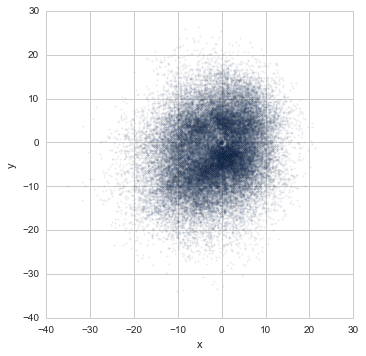

In [30]:
df.plot(kind='scatter', x='x', y='y', alpha=0.10, s=2)
plt.gca().set_aspect('equal')

## 2.2 Overview By Month

In [31]:
viridis = plt.get_cmap('viridis')

month_incre = 1
# current_df = df_all_years.query('(date >= 20100000) & (date < 20150000) & (speed >=1)')
current_df = df.query('speed>=1')
for month in arange(1, 12+month_incre, month_incre): 
    end_month = month+month_incre
    sub_df = current_df.query('(month >= @month) and (month < @end_month)')
    if month_incre == 1:
        title = 'Month: %s' % (month)
    else:
        title = 'Month: %s - %s ' % (month, end_month-1)
    ax = WindroseAxes.from_ax()
    ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
    plt_configure(figsize=(3,3), title=title)
#         fig,ax = plt.subplots(figsize=(3,3))
#         sub_df['speed'].hist(bins=arange(0,sub_df.speed.max()))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANQAAADZCAYAAABYQB7GAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnXd4lGX29z/TW8qkTEIa6QkkFJGigNjLioiggBVxce0d
xb66a9m1IJZXrKwNsSIKooBIERWRKiU9Ib2X6b087x9xRmIIEGZC+ZnvdeUizDxz5p7J/X3OuU8V
CYIg0I9+9CMkEB/rBfSjH/+X0E+ofvQjhOgnVD/6EUL0E6of/Qgh+gnVj36EEP2E6kc/Qoh+QoUY
9fX1DBo0iJkzZ3Z77qGHHmLQoEEYDIYjlr9gwQLWrVsXkPfuu+8esaxgX9+P7ugnVB9AoVBQWVlJ
Y2Nj4DG73c6OHTsQiURByd68eTMejycoGRUVFcyaNYtVq1YFJacf3SE91gv4vwixWMzEiRNZvnw5
N910EwDfffcdZ599Nu+9917guk8//ZQPP/wQiURCTEwMjz32GKmpqTz00ENoNBpKS0tpamoiIyOD
F198kaVLl7J3716ee+45xOLOe+GOHTtYvXo17e3tZGdnM3/+fJRKJa+88goikYg77rij2/o++ugj
LrvsMhITE4/K9/GXgtCPkKKurk4YMWKEUFBQIEycODHw+HXXXSeUlZUJgwYNEvR6vbBp0ybh/PPP
F/R6vSAIgrB06dLA9Q8++KBw5ZVXCm63W3C73cLUqVOFpUuXCoIgCNdcc43w3XffBa6bMWOG4HQ6
Ba/XK0ydOlVYtmzZYa/1wQcfFN55551QffR+CILQb/L1EfLy8hCLxRQWFtLU1ITNZiMrKwvh90yv
n376iQsvvBCtVgvA1KlTaWlpob6+HoAJEyYglUrZsWMHJSUl1NXVBWQvW7aMr776CoBzzjkHuVyO
WCwmJyeHjo6Oo/xJ+7E/+gnVh5g8eTLLli1j2bJlTJ48GSBwhvL5fN2u9/l8gfORUqkMPC6RSFix
YsUB30MmkwV+F4lEAcL249ign1B9AP+mnjx5MqtWrWLlypVcfPHFXZ6bMGECK1euDGiUL774gqio
KFJTU7vJ0+l0KJVKFi9ejFQqPSAZ+3F8oN8p0Qfwa6H4+HiysrIIDw8nIiKiy3Pjxo1j1qxZzJo1
C4CoqCjefPPNHuVdcMEFvP/++1x00UW8//77xMbGHnQNB3NK9KPvIBL6bYTjGlu2bOHTTz/lhRde
YP369bz11luMHDmSrKwspkyZcqyX148/od/kO4Fw1llnkZ6eztKlS4/1UvrRA/oJdYLh4Ycf7uKw
6MfxhX6Trx/9CCH6NVQ/+hFC9BOqH/0IIfoJ1Y9+hBD9hOpHr/HWW29xxRVXcNlll/HFF190e95u
t3PllVdSWVl5DFZ3bNEf2D3GEAQBn8+Hy+XC7XYHflwuFz6fD0EQuqUTiUQiRCIREokEmUyGTCZD
LpcHfheLxUGXifSELVu2sHPnTj755BNsNhvvvPNOl+f37t3L448/TnNzc5+8//GOfkIdJfh8PhwO
B1arFavVit1ux+Vy4fV6gc6Sj/1/pFIpEokkQAyRSITBYCAyMrILCc1mMz6fr8sPgFQqRSaToVKp
0Gg0aDQalEploOzjSPHTTz+Rk5PDrbfeitVq5f777+/yvNvt5rXXXmPu3LlBvc+Jin5C9QH+TB6L
xYLL5UIsFiOTyVAoFERGRgY2u1wuPyy527dvJyMj45DXuVyuAGltNhstLS243W58Ph8KhSJAMI1G
g0ql6pU20+v1NDQ08Oabb1JbW8stt9zSpVBxxIgRAH/ZJN1+QoUIHo8Ho9GIXq/HZDIFyKNUKomP
j0er1XbJDO9LyOVy5HI5UVFRXR53u90YDAZMJlMXkkVERBAdHU1ERARS6cG3hFarJTMzE6lUSnp6
OgqFgo6ODqKjo/vyI50w6CdUEHA4HBgMBvR6PXa7HZlMRlhYGLm5uWg0mmO9vG6QyWTodDp0Ol3g
MYvFQmtrK/X19VRVVaFSqYiOjkar1aJQKLrJGDlyJIsWLeK6666jubkZh8PRjbh/ZfQTqpdwuVy0
trbS0dGBx+NBoVCg1WrJzs4+5N39eERYWBhhYWFAp5ZtaWmhvb2dhoYGpFIp0dHR6HS6gFl65pln
sm3bNqZNm4YgCDz22GN888032O12pk+fHpDbV06R4x39qUeHAUEQMJvNNDc3YzabUSgU6HQ6YmNj
gz7k9wbbt29n5MiRR+W9fD4fra2ttLW14XQ6iYiIIC4ujvDw8L8sWQ4HJ94t9SjC4/HQ1tZGS0sL
giAQGRnJkCFDDtuJcCJDLBYTHx9PfHw8LpeL+vp69u3bF3g8JibmhNTIfY3+b+QAsNvtNDU1odfr
kcvlJCQkEBsb+5e9M8vlctLT0xEEgba2Npqbm6mvryc6Opr4+HhUKtWxXuJxg35C7Qen00l9fT0G
gwGNRsOgQYNQq9XHelnHDUQiUcCpYbVaqa2tpaioiKioKJKSkv4SmvtQ6CcUnaZdQ0MDbW1taDSa
v4xZFwz8Nxyn00lVVRV79+5Fp9ORkJDwlzYF/7qfHPB6vTQ3N9Pc3IxSqezXSEcAhUJBbm4uNpuN
qqoq2traGDBgAHFxcUgkkmO9vKOOvyShBEGgtbU14BrOzMwMNFHpx5FBrVaTl5eHyWSipqaG5uZm
EhMT0el0f6mz51+OUA6Hg8rKSlwuFykpKcTExBzrJf2fQkREBEOGDKGtrY26ujra29vJyMg4YJD4
/yL+MoQSBIHm5mYaGxsJDw8nNzf3qMaQ/mqIjY0lOjqaiooKCgsLSUxMJC4u7v+8tvpL7CiHw0FR
UREtLS1kZmaSlZXVT6bDRHt7O2eeeWa32qavvvqKyZMnc80117BkyZIDvlYsFpOdnU1mZiZNTU0U
FxfjdDqPxrKPGY7ZrtqyZQujRo3qUjfzwgsvBHp2AzQ1NXHRRRcF/r9ixQry8/MD3Vbr6+sP2ptO
EASampooKipCqVQyZMiQ/rNSL+DxeHj88ce7dVnS6/W88sorLF68mEWLFvH111/T0NDQo5yIiAiG
Dh2KQqGgsLCQ5ubmQ2ajH87+gM4ZV5MnT+baa69l5syZXHvttQcsejxaOKYmn1wu56GHHupWpObH
gAEDADAYDGi1WjZu3MgFF1zAxo0bmTJlCr/++iunn376AV/rdrspLy/H5XKRkZFBZGRkn32OYCEI
Ah6PB6fTidvtxuv14vF48Hg8gXopP6qrqwEC9VL+f/1lIVKpNGRm1bPPPsuVV17ZraNtbW0tgwcP
Jjw8HIChQ4fy22+/HXQ8jlgsJiMjA4PBQFVVFXq9nszMzINm4B9qf/jxwAMPMH78+F58sr7DMbV7
Tj31VCIjI1m8eHGP14wdO5bt27cjCAKlpaXMnj2bDRs2AJ13sQkTJnR7jdVqpaCgAJFIxJAhQ44r
MvlLKBoaGgLni99++43CwkLq6uro6OjAYrHg8XiQSCSo1erAD3R601QqFWKxGI/Hg8VioaOjg7q6
ui6yKioqaGhowGg04na7e73OpUuXEhMTw/jx47tpk7S0NMrLy+no6MBut/PLL79gt9sPS65Wq2Xo
0KEIgkBhYSE2m63Haw9nf8CBBy8cKxxTDSUSiXj88ceZPn36AYkBnT3At27dik6nY8iQIQwZMoTi
4mIEQaCgoICnn366y/Xt7e3U1NQQFxdHUlLS0fgYB4XT6cRkMmE2m7FarXi9XtRqNRqNhqioKJRK
JQqF4rBiNjU1NV1KLw4Er9eL0+nE4XBgt9tpbm7GZrMhkUjQaDSEh4cTGRl5yMD10qVLEYlE/Pzz
zxQXF/PAAw/w+uuvExMTQ0REBA8++CB33HEHWq2W/Pz8XpVwSCQSBg8eTF1dHSUlJaSmph6wnupw
9gfAvHnzePv

## 2.3 Create input data, i.e. speed_set

In [32]:
SPEED_SET = array(zip(df.x, df.y))
NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
KDE_GRIDSEARCH = True
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [33]:
FITTING_RANGE = []
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print fitting_axis_range

for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-19. -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.
  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.
  11.  12.  13.  14.  15.  16.  17.  18.  19.]


In [34]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 3. Kernel Density Estimation

In [35]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [36]:
%%time
from sklearn.grid_search import GridSearchCV

if KDE_GRIDSEARCH == True:
    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.4,1,0.1)
    
    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=50000, replace=True)
        bandwidth_search_sample = array(zip(df_resample.x, df_resample.y))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                        {'bandwidth': bandwidth_range},
                        n_jobs=-1, cv=4) 
    
    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']

CPU times: user 475 ms, sys: 81.3 ms, total: 557 ms
Wall time: 1min 59s


In [37]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

# bandwidth = 0.7
kde = neighbors.KernelDensity(bandwidth=bandwidth,kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print 'bandwidth:', bandwidth, len(kde_result)
print kde_result[:5]

bandwidth: 1.7 1521
[  4.99827293e-05   6.80932881e-05   8.82067168e-05   1.07055979e-04
   1.20901773e-04]


In [38]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x', ylabel='y',ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(4,3))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXu0HWV9P/yZ276eSxIiIhcFAoqliWigL0JtcYGt9F1v
C4ZUEgkKbRUV3yq8FOlaBvoDjAvb8mv1F0VALSg1UFDRZStSqEWxgkSkRhOKaEQIhJPknLPvc33/
2Ps7+5lnP3Pds8/Zc8581spKsvfMs2fPnvnM53uXHMdxkCNHjhzLFPJiH0COHDlyLCZyEsyRI8ey
Rk6COXLkWNbISTBHjhzLGjkJ5siRY1kjJ8EcOXIsa+QkmCNHjmWNnARz5MixrJGTYI4cOZY1chLM
kSPHskZOgjly5FjWyEkwR44cyxo5CebIkWNZIyfBHDlyLGvkJJgjR45ljZwEc+TIsayRk2COHDmW
NXISzJEjx7JGToI5cuRY1shJMEeOHMsaOQnmyJFjWSMnwRw5cixr5CSYI0eOZY2cBHPkyLGskZNg
jhw5ljVyEswxAMdxYNs2HMdZ7EPJkWPkUBf7AHKMF2zbhmmaaLfbkCTJfb1SqUBRlEU8shw5RoOc
BHO4aLVaqNVqKJVKkGUZjuOg1WrBsizYtg1ZlqGqqvt3Too5lgJyEswBx3FgWRYMw4BlWeh0Oi7p
2bYNAK4qNE0TjuOg0+lAlmUoipKTYo5MQ3Jyx8+yBpm/tm2j0+mg2WwKt5MkCYqiuH9kue9Opkso
J8UcWUROgssYpmnCsiwAQKfTQaPRAAAoioJyuQzLstBut4UBkpwUcywV5CS4DOE4jocAm80mOp2O
+365XIaqqh6fYKVScc1m+sOCSJF8hiwp6roOXddRLpdRLBZzUswxVsh9gssMtm3DMAyX0Or1Omzb
hqIoKBaLgeYwKTugn0bDkqJpmjBNE0BfBSqK4ipDIt/cp5hjnJCT4DIBq+KIhIjwisUiKpWKS2BR
wJrDtD5PikS4BPq3oiiQJCmQFAuFgidFJ0eOUSEnwWUAXddhmqab9tJoNGAYBiRJQrVaRaFQGPoz
gkiRVZ5kRrNKMYwUFUWBpmk5KeYYCXISXOKwLAtzc3MwTROTk5NoNBqwbRuqqmJiYsLjuyOk4Sbm
SVHXdRQKBZcMbdv2KMUgUjQMA+12G4ZhQFEUVCqVnBRzpIacBJcoePMXAGq1GoBu4KNUKkUiEdrG
cZyhSYd8f/zxRSVFXdfdoEu73c6VYo5UkJPgEgSb+0dmKdAltImJCWiatshH2D0WVVVjkSJtR/vz
SjEnxRxJkJPgEgNFaYFuIKLRaLjEMTU1FRiBXUzSiEKK9Hqj0YhkPlOQJSfFHEHISXCJICj3j8rf
skQCIlKkZG76PqxS5BO3JUnybEOBFjafMU/JyQHkJLgkwOb+2baNer0Oy7IgyzImJibQarVcJRUF
5P8bpzx6InBZloWJ23wCt6iahe2QUygU3EYRRLZZekjkSA85CWYcrPrTdd1VS5T7J0nS2NzcaZJq
mPnsR4osWKVIyeA5KS4/5CSYUei6jlar5Zp2jUYDuq4DAKrVKorF4iIfYR8LQSZBpEgPCpYUWTOa
VYo5KS4/5CSYQVBjg2aziVKp5Ob+KYqCiYkJX19XmBJbSjc5S4rFYtFN3CZCdBzHfWgA/uZzTopL
HzkJZgh81QUAtNttAECpVEK5XBbemPnNCpfAJEmCZVnQNA2yLMf2KRIp0valUgmlUsmNUOfIHnIS
zAj43D8iPwCYmJhIpfRNBDZZeimAbfOlaZqbM8nXPYeRIpGhoihu0Ine0zQtJ8UMISfBDIDqb4Fu
IKRer7s3c6lUSp0AHcdZMqQXFaQUo5AiG2wiNwSfkgP0iZPScXJSHE/kJDjG4HP/Wq2WqwALhQJ0
XY91Y8UhtnFLkVlosKRIDwVR8rau664iZBO3WVIk3yM/nyUnxfFAToJjCj73r9FouJ1gJiYmXMd+
2mknQJcsKRiwnImQQKTGkiKRH3XmYXsp8l23aX8iUJYUKYDDd+fOsXDISXAMwao/tvStUCigUqlA
lmVPn74wxFUcVHrGv0ZEsNzBnk/qlM0rxSBSpHNIbo5Op4NisehJ3s6V4sIhJ8ExgmmaqNVqkGXZ
7fJMpW+VSgXFYtG9MZLcIGGqjhSK4zhue32WjEkdLoafa5wVqUgpBnXdZkmR/V6sUqRtclIcPXIS
HBPQxd9ut6FpGjqdDizLGjr3Lwocx/EQLvXss20b7XYbpml6SNGvjf5C3KhZIIIoXbfZcwjA/Tev
FHNSHD1yElxkiPr+kSnKlr4Ng6D9ac4I1RrTvGF+X0r7CGujv9CkmAXE7bodZD6bppmTYsrISXAR
wef+tVot972w3L80Lnh2zGaxWES5XMbs7GzgPqIbOqgPIKtgx9mkXUj4dd0GIFSKfg8WlhTp/6qq
un7jnBSjISfBRQKb+8dOfQO6UcNRJD+zU99Y85dqjf3mC7P7it4Pa2RA0HXdNfHZllcLiXElYr7r
dly1Ta4LcluwSpGqY3JSFCMnwQUGn/vXbrddBVgqldBut0eW+wd4zd8wf2MSiEix0+m40WWeGMmU
Y1NJFgLDfg7b4TrtdeJO8uMJTqQUc1L0R06CCwje/K3X6y45TExMQFVVTzlcEOJcwLStYRio1+sA
gv2NaeceKooC0zRRKBSgKErsVJLljiikSDBNE81mM9B85if5URL3ciXFnAQXCKz6Y0vfNE1DtVp1
c82A9E02Wo83fxcDQZUYRIg8KdJNmqMLESkahuEqvrChVXygpdPpuAqeDbQsF+QkOGJQ7p+iKCgU
Cp7St4XI/aO2W0D3ZpicnIx0gS9UD8A4+XVAX03n0dA+2CR2agoRd5IfAHfm8/z8PGzbdq+VpU6K
OQmOEFQ3Su3c2+22p+09+c14RFGCUQiAjf4CcFs+DbPmKBFk9ok66CyFdJy0fIsskkzyY88jnXd6
ALHm81JUijkJjgCivn+UxlAoFFCtVkd6w/LR32Kx6Jo8WQJLipqmeabM+aXjLFTkeVyjzCLEJUUC
Bc/YSX4U6FpKpJiTYMpggx8APLl/UXxxcW9c/mYURX/paR5nzXG9ySVJcs9h3GFLoyDFcXmwxFGU
UUgR6DfsFZ3HpUSKOQmmCDLb6KLic/+iBiOSEhCf/EzRX/KpjSuxJYXfzczOFOHTcUYVfMoy+PNI
DTt43yIhKinyfspxRU6CKYDP/et0Omg2mwDim6JJtvNLfk4DWeoszd/MoiALga3NXsx0nFH4BNPA
sIqb7olGo+HWov/gBz/A4Ycfjje84Q2L9bWEyElwSPC5f41Gw+22Uq1W3WYIcUgkzra2bWN+fj4w
+TlJTuEosNBEKkrHabfbrjr3S8fJYpBllGQa9nDxI0V6sBApPvbYY1i7dq0vCTqOg+uuuw579uxB
oVDAjTfeiGOOOcZ9/6GHHsL27duhqio2bNiAjRs3+u7zzDPPYOvWrQCA17zmNbjxxhshyzJuvPFG
7Ny5E9VqFQC666V+xpYR+Nw/mvqmqiomJiYWRF3QDZ1Ws4VRYByOidJxFKU7E6RUKnkqWBa7O844
wXGcwGs3zigCoHtvPPzww2i1WiiVSr7rPvjgg9B1HV/5ylfwk5/8BNu2bcP27dvdNT7xiU/gvvvu
Q7FYxKZNm3D22WfjiSeeEO5z880348orr8T69etxzTXX4KGHHsI555yDXbt24fbbb8eKFSvcz81J
MAEMw0C73XZvFLb0rVwuuzcYi6gqKEo3ZzJ/CVHN36jHQLWnSxlJStP4NJIcXfiRIomEp59+Gldd
dRUA4Fvf+hbuv/9+vPWtb8U73vEOz3X2xBNP4C1veQsA4A1veAN++tOfuu/94he/wGte8xpMTEwA
AE499VQ89th

In [39]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM by Expectation-maximization

In [40]:
sample= SPEED_SET
clf = mixture.GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print clf.converged_

True


In [41]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.358   1.590  -4.387  5.381  6.476  0.220
2  0.334  -0.353   3.492  6.053  6.113  0.060
3  0.308  -7.107  -5.489  6.380  6.917  0.099

GMM Plot Result
0.357939741157 [[ 1.5898578  -4.38667174]] [ 5.04112553  6.74431792] 155.163403789
0.334397465846 [[-0.35269246  3.49196566]] [ 5.89552256  6.26554493] 139.69583119
0.307662792997 [[-7.10749159 -5.48901205]] [ 6.21583662  7.06443146] 154.640012691


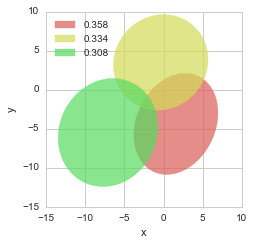

In [42]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax)

In [43]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)[0]))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points)[0])
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuUJGV9Pv7Utbune2b2BugKLshFBEFwMSGSKP7EY/zm
FwVhI7txiWh+iornKNEIRkATcI3mhCSaFS/k+zUYFPgimAvGaNB4NCQguBLRRQVZZLns7lx6erq7
uq6/P6o/1W+9/datu3qme6eec+bMTHf1W9XdVU89n7vkeZ6HAgUKFFijkFf7AAoUKFBgNVGQYIEC
BdY0ChIsUKDAmkZBggUKFFjTKEiwQIECaxoFCRYoUGBNoyDBAgUKrGkUJFigQIE1jYIECxQosKZR
kGCBAgXWNAoSLFCgwJpGQYIFChRY0yhIsECBAmsaBQkWKFBgTaMgwQIFCqxpFCRYoECBNY2CBAsU
KLCmUZBggQIF1jQKEixQoMCaRkGCBQoUWNMoSLBAgQJrGgUJFihQYE2jIMECBQqsaRQkWKBAgTWN
ggQLFCiwplGQYIE+eJ4H13Xhed5qH0qBAiOHutoHUGC84LoubNuGYRiQJCl4fGpqCoqirOKRFSgw
GhQkWCBAu91Go9FAuVyGLMvwPA/tdhuO48B1XciyDFVVg98FKRY4HFCQYAF4ngfHcWBZFhzHQafT
CUjPdV0ACFShbdvwPA+dTgeyLENRlIIUC0w0JK9w/KxpkPnrui46nQ5arZZwO0mSoChK8CPLPXcy
nUIFKRaYRBQkuIZh2zYcxwEAdDodNJtNAICiKKhUKnAcB4ZhCAMkBSkWOFxQkOAahOd5IQJstVro
dDrB85VKBaqqhnyCU1NTgdlMPyyIFMlnyJKiaZowTROVSgWlUqkgxQJjhcInuMbgui4sywoIbXl5
Ga7rQlEUlEqlWHOYlB3QS6NhSdG2bdi2DaCnAhVFCZQhkW/hUywwTihIcI2AVXFEQkR4pVIJU1NT
AYGlAWsO0/o8KRLhEuhvRVEgSVIsKeq6HkrRKVBgVChIcA3ANE3Yth2kvTSbTViWBUmSUK1Woev6
0PuII0VWeZIZzSrFJFJUFAWaphWkWGAkKEjwMIfjOKjX67BtG9PT02g2m3BdF6qqolarhXx3hDzc
xDwpmqYJXdcDMnRdN6QU40jRsiwYhgHLsqAoCqampgpSLJAbChI8TMGbvwDQaDQA+IGPcrmcikRo
G8/zhiYd8v3xx5eWFE3TDIIuhmEUSrFALihI8DAEm/tHZingE1qtVoOmaat8hP6xqKqaiRRpO3o9
rxQLUiwwCAoSPMxAUVrAD0Q0m82AOGZmZmIjsKtJGmlIkR5vNpupzGcKshSkWCAOBQkeJojL/aPy
t0kiAREpUjI3vR9WKfKJ25IkhbahQAubz1ik5BQAChI8LMDm/rmui+XlZTiOA1mWUavV0G63AyWV
BuT/G6c8eiJwWZaFidt8AreomoXtkKPretAogsh2km4SBfJDQYITDlb9maYZqCXK/ZMkaWwu7jxJ
Ncl8jiJFFqxSpGTwghTXHgoSnFCYpol2ux2Yds1mE6ZpAgCq1SpKpdIqH2EPK0EmcaRINwqWFFkz
mlWKBSmuPRQkOIGgxgatVgvlcjnI/VMUBbVaLdLXlaTEDqeLnCXFUqkUJG4TIXqeF9w0gGjzuSDF
wx8FCU4Q+KoLADAMAwBQLpdRqVSEF2ZxsSIgMEmS4DgONE2DLMuZfYpEirR9uVxGuVwOItQFJg8F
CU4I+Nw/Ij8AqNVquZS+icAmSx8OYNt8aZoW5Ezydc9JpEhkqChKEHSi5zRNK0hxglCQ4ASA6m8B
PxCyvLwcXMzlcjl3AvQ877AhvbQgpZiGFNlgE7kh+JQcoEeclI5TkOJ4oiDBMQaf+9dutwMFqOs6
TNPMdGFlIbZxS5FZabCkSDcFUfK2aZqBImQTt1lSJN8jP5+lIMXxQEGCYwo+96/ZbAadYGq1WuDY
zzvtpEA/iNRYUiTyo848bC9Fvus2vZ4IlCVFCuDw3bkLrBwKEhxDsOqPLX3TdR1TU1OQZTnUpy8J
BbnlC/bzpE7ZvFKMI0UiO3JzdDodlEqlUPJ2oRRXDgUJjhFs20aj0YAsy0GXZyp9m5qaQqlUCi6M
QS6QSTZvx/nYRUoxrus2S4rs+2KVIm1TkOLoUZDgmIBOfsMwoGkaOp0OHMcZOvdvEIw74Yw70nTd
ZkkRQPA3rxQLUhw9ChJcZYj6/pGpy5a+DYOsr3ccB41GI/S6cSbGcUfWrttx5rNt2wUp5oyCBFcR
fO5fu90OnkvK/RvlCc+2rSJQayq+U0uB7Ijqug1AqBRFbcNoWyJF+l9V1cBvXHw/6VCQ4CqBzf1j
p74BftRwFMnPcWqO8g8BBLNHaNaHbduh6CaBz4GbhItuXBUt33U7bmiViBRd14VhGMGoVFYpUnXM
JHw/q4GCBFcYfO6fYRiBAiyXyzAMY2S5f1GvZyfPAT2/lOu6gSlGUdC4BOKoYezjiGEJge1wnfc6
WSf58QQnUooFKUajIMEVBG/+Li8vByqrVqtBVdVQOVwcspzAUdtSo1K6SKrVaqAGRUhKIBZFQEmZ
FBgcaUiRYNs2Wq1WrPnMT/KjJO61SooFCa4QWPXHlr5pmoZqtRrkmgErY7LRMbCT57ISa5a0ENon
XdBr9YLLAyJStCwruJklDa3iAy2dTidI2mYDLWsFBQmOGJT7pygKdF0Plb6tdO4fqTfW/GW7z7Br
ZT2WPOYOFxgMdDMCEDSFyDrJD0Aw83lpaQmu62J6enpNjCIoSHCEoLpRauduGEao7T05wnmkIbZB
CZM3f9kATJ5ExJKiJEnodDpBcwLRhblWI895+RZZDDLJj/386QZGSp41nw9HpViQ4Agg6vtHaQy6
rqNara7oRU77arfb8DwPqqqiWq2u+InMdmkZZEbIOGGS/JxZSZFAyfrsJD+yJA4nUixIMGewwQ8A
ody/NG3vs5Jj0sVI/iL6O675KvuaUV/k/IWZ1LqKnzs8LhgXxZpFUaYhRaDXsFek0g8nUixIMEeQ
o5lOKj73L+3cj7wudNb8BRA0YBhHpOnnR483m82xV4qTBJ4UqWEH71skpCVF3k85rihIMAfwuX9s
4KFUKgXRtzTIazs2+ks5f1E+yDT7WWkFxqfjuK4bqGq+ddUkB1lG4RPMA5IkBTftrK4LlhTphjU1
NYV7770XRx55JF7ykpes1tsSoiDBIcHn/jWbzWAwT7VaDZohZI3iDrNtp9MJjd6kaXRpMMqLcVAi
Zc1hRVFQLpczV1QMewzjjlGSaRbXBYA+hU6keN999+G0006LJEHP8/CRj3wEjzzyCHRdx/XXX49j
jjkmeP6ee+7B7t27oaoqLrzwQmzbti3yNb/4xS9wzTXXAAC2bNmC66+/HrIs47bbbsOtt94KTdNw
2WWX4dxzzy1IcBjwuX809Y3y7lbaTIuK/rJT1VYDeV+YUek49H3ERZ7HVXmNEzzPiz13s4wiAPxr
49vf/jba7TbK5XLkut/61rdgmia+8pWv4Ec/+hF27dqF3bt3B2t8/OMfx1e/+lWUSiVs374dr371
q/HAAw8IX3PDDTfgj/7oj7B161ZcddVVuOeee3DGGWfg5ptvxp133gnDMLB9+3acc845BQkOAsuy
YBhGoDjY0rdKpYJyudx3kaVVIFna2rP7IB9kXPuttOtS7emkQESKcRclgMiSs7Q4XBXlIIgiRbop
/exnP8MHPvABAMDdd9+Nf/zHf8SrXvUqvPGNbwx99g888AB+67d+CwDwkpe8BD/+8Y+D5x599FFs
2bIFtVoNAHDWWWfhvvvuw549e4Sv+fSnPw1JkmCaJg4ePIjp6Wk89NBD2Lp1ayBSjj32WDzyyCMo
PMoZQb6p5eV

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADZCAYAAADlhB+aAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnX1QVOf1x7/LLriWxaIJ+AIGFDUKwRcwaaop44xQbSbN
m2IUDU2l0djEzkRDxKYRTVRMJhk7DTFNxvRnxUlEk3TMZJKmUg1M1CaBBuILiGLkzRdWgbqsEGC5
vz/Ive4ue+/ee/fZ3bu75zPDhGXv89zDhvv1POc5zzk6juM4EARBMCTM3wYQBBF8kLAQBMEcEhaC
IJhDwkIQBHNIWAiCYA4JC0EQzDH42wCCIDyD4zhs3rwZZ8+eRUREBLZt24bx48cL7x85cgS7du2C
wWDAokWLkJ2dLTrm/Pnz2LRpEwAgISEB27ZtQ1hYGMrLy7Fr1y4AQEpKinCNlFEEQQQw//rXv7iC
ggKO4ziuurqaW7NmjfBeX18fl5WVxVksFq63t5dbtGgRd/36ddExv//977nKykqO4ziuoKCAO3z4
MNfV1cU98MADXEdHB8dxHLd7926uvb1d0ibyWAgiwKmqqsIvfvELAMCMGTNw6tQp4b2GhgYkJCTA
ZDIBAGbPno2vv/4a1dXVLscUFxdDp9Oht7cXZrMZUVFR+PbbbzFlyhTs2LEDzc3NyM7OxsiRIyVt
ImEhiACnq6sLUVFRwmuDwYCBgQGEhYUNee8nP/kJLBYLrFar6JhLly7ht7/9LaKiojB16lRUVFTg
q6++wscffwyj0Yjly5dj1qxZSEhIELUpYIWlqqrK3yYQhCTp6emyrvu2+t8YsEWLvh8REYHU1FTR
900mE6xWq/CaFwj+va6uLuE9q9WKn/70p5Jjxo0bh88//xwHDx5EUVERHnjgAaSmpmLUqFEABr2e
2tra4BQWADiwtcLjOSxdFkSZotxfSPPSvApY8qcM2dcO2KIx+o4i0fevNm2UHJ+WloajR49i4cKF
qK6uxpQpU4T3kpKS0NjYiBs3bsBoNKKyshJ5eXkA4HLMmjVrUFBQgISEBERGRiIsLAzJyck4d+4c
Ojs7YTKZUFNTg8cee0zSpoAWFoIggKysLBw7dgxLly4FABQVFeGTTz5Bd3c3srOzsXHjRqxcuRIc
x2Hx4sWIjY11OQYAVq9ejYKCAkRERGD48OHYunUrRo0ahXXr1mHlypXQ6XS4//77MWnSJEmbdBwX
mKebq6qqyGOheTU775I/ZcheClVVVbn1WOTOpRUoQY4gCOaQsBAEwRwSFoIgmEPCQhAEc0hYCIJg
DgkLQRDMIWEhCII5JCwEQTCHhIUgCOaQsBAEwRy/CUtNTQ0ef/xxAEBtbS0yMjKQm5uL3NxcfPbZ
Z/4yiyAIBvjlEOLu3btx6NAhREZGAgBOnTqFlStX4oknnvCHOQRBMMYvHktCQgLefPNN4fXp06fx
xRdfYMWKFXjhhRdw8+ZNf5hFEAQj/CIsWVlZ0Ov1wusZM2bg+eefx759+zB+/Hi88cYb/jCLIAhG
aKIeS2ZmplAmLysrC1u3bpU1ztJlYXJ/VvPQvDQvMYgmhCUvLw8vvvgiUlNTceLECaSkpMgax6Ju
htbretC8wTGvO77qFi/zmOg7M5ihCWHZvHkzXn75ZYSHhyMmJgYvvfSSv00iCMID/CYscXFx2L9/
PwAgOTkZ77//vr9MIQiCMZrwWAhtUd/eLfn+lFHDfWQJEaiQsIQ4vIjYbDroewe/T0odL3p9w8lm
SeEh0SEAEpaQxV4cklLHw2KxODSwEkOp6NhsOkwzqbeTcA/ng97NBw4cQGlpKcLDw/HUU09h3rx5
kjaRsIQQzmLCGldz1ldfdLgveTTsKSsrQ29vL/bv34+amhoUFRUJDdz7+/uxY8cOfPTRRxg2bBiW
LVuG+fPno6qqyuWYnTt3Yv369UhPT8fGjRtx5MgRzJw5EyUlJfjHP/6Bnp4eLFu2DHPnzkV4eLio
TSQsIYC3BUWKsUm3CZ6QvUdDAsMOb/du/u6775Ceng6DwQCTyYTExEScPXsWd911l6hNJCxBivOS
xNeC4greBhIYtni7d3N5ebnLOaQgYQkitCgmriCBYYu3ezcvWLBgyBwjRoyQtInqsQQB9e3dwgOa
lDpe+NI69na62+ImxElLS0N5eTkASPZu7u3tRWVlJWbOnIlZs2a5HLNmzRo0NjYCgNC7OTU1VYjJ
WCwWXLhwAZMnT5a0iTyWAMWfcRPWJKWOF7wX8lyU4+3ezbfffjsef/xx5OTkgOM4rFu3DhEREZI2
Ue/mADtzUmvuEk6GsxQUudvN3p634WQzAPdLI63/f1Pau/lizHui7yeacwKudzN5LAGAvXdiv8sS
jJD3EhyQsGgYV8sdd9H4YIAXFyJwIWHRIMEUP1FLUup41J9sJq8lQCFh0RAkKEOhJVFgookq/U1N
TcjJycGKFSuwZcsWf5nkN1xtFxOgregARhNV+ouKirBu3TrMnj0bhYWFKCsrQ2Zmpj9M8zn2guIv
Tlo60G+zwWDpZzZnatRIJvOESrzlQleL6HuJvjODGX4RFr5K//PPPw9gsEr/7NmzAQAZGRk4fvx4
0AuLPwXlpKVjyM/GxY1gttvUcO6KcA9esDwRmlCIt3Ta5vjbBKb4RViysrLQ2toqvLZPpYmMjAzq
nQ9/xFGchSRp8pgh17D8zO3nt1gsaLtiFWzwRGAo3hI4aCJ4y59RAOSdQ+AJtCr9Ld06AIO5KID6
h1nOuPO2Hxxej4u79ZmKjfeWoMeOGVzyXmq9gW87rwEAJumHKZsjMRqXG647fKZUpV+7aEJYkpOT
8c033+Duu+9GRUUF7r33XlnjAqVKP++l6PWeeynuMll5z8Cg17v0TNTOqxb7ee+c+mP5hHNXcBHK
l0dt+k5c7h3MytV65m2oowlh2bBhA1588UX09fUhKSkJCxcu9LdJzPBVLMV+uaNEUPxB0uQxQhxG
ibiESiA3GNBElf7ExESUlJT4yxSv4QtRCSRBsYe39eS5KwDkx174QO5Y6TNwhJ/RhMcSjLR065gs
fcQIVEFxhvdelNLSTbV0tQzVY/EC3vRUztt+EEQlafKYgBYVnqTJY1xugYteTwmEmoc8FsbwosLv
/LCClYdSYzW7/LmNs0Fv7ZE9z4zIGNU2iKE05kLbz9qFhIUh9p4Kq61bZ0FRM6+zmExJiB1yjdLd
kJrGNpc/Vys4SgO6Y5NuQ9vFTlX3IrwPCQsjWC9/WHgo9oLiSkw8wdV89Y1tDvdUKjJKxSUUMnID
FRIWBrASFW8sd1gLihTO96ppbBOWWHJFRm0wl9AWJCwewkJUWO7w8KLiS0ERY0pCLCxdFly+3i3Y
JVdgyGsJbEhYPMBTUQlWQXGGt4lfKrkTF/JaAh8SFg9RIyreEBRAvqhU9w4NvNr0NqEpvBgzIzwT
rSkJsYrE5eS5K+S1yIBl7+ba2lps3boVer0eERERePXVVzFq1CjhPqtWrUJmZiYee+wxSZtIWFRS
397tkaj4W1CmxTk+2HLOClW3OgqSGqFRIi6A8i3oUIRl7+bt27dj06ZNuPPOO1FaWop33nkHBQUF
AIA///nPsnclSVhUoLaiGQtROcdZhXwTFoKiBPuxta1mh3mViIxccVGyJAplr4VF7+bTp08DAHbu
3Inbb78dwKAoDRs2eAr9888/R1hYGO677z5ZNpGwKERNXMVTQbH3TuJjTYryTfiH3xNBcYWYyMgV
GCWeC3kt0rDo3azX6zEwMCCIyn//+1+899572LdvH+rr6/HJJ5/gL3/5C958801ZNpGwKMCXoiKW
1Ca3Voi3BMUV9vfgl0tyBEaOuISK11LbKfE7/kR6LOvezZ9++inefvttvPPOOxg5ciR2796NtrY2
5ObmorW1FRE

## Goodness-of-fit Statistics

In [44]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points)[0])
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.971  0.019      0.018  1.612577e-08      0.037       0.198

# 5. GMM by Optimization

In [45]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print FIT_METHOD

square_error


In [46]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -19.016305169960479
     jac: array([  1.00235772e+00,   2.38418579e-07,   4.76837158e-07,
         0.00000000e+00,  -2.38418579e-07,  -4.76837158e-07,
         1.00235200e+00,   0.00000000e+00,  -2.38418579e-07,
         2.38418579e-07,   2.38418579e-07,   7.15255737e-07,
         1.00235343e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   2.38418579e-07,   2.38418579e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1256
     nit: 62
    njev: 62
  status: 0
 success: True
       x: array([ 0.36984559,  0.05373375,  4.68294736,  7.06428627,  4.75251404,
        0.11938282,  0.5185415 , -3.37898592, -6.64740534,  7.78529536,
        5.97578101,  0.08500046,  0.11161291,  1.74359825, -3.74618255,
        3.90013131,  2.97030974,  0.35421354])

## 5.1 GMM Result

In [47]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.519  -3.379  -6.647  7.785  5.976  0.085
2  0.370   0.054   4.683  7.064  4.753  0.119
3  0.112   1.744  -3.746  3.900  2.970  0.354

GMM Plot Result
0.518541499532 [[-3.37898592 -6.64740534]] [ 5.92427497  7.8245606 ] -81.1895787674
0.369845591423 [[ 0.05373375  4.68294736]] [ 4.6915318   7.10493206] -81.823113234
0.111612909045 [[ 1.74359825 -3.74618255]] [ 2.61090468  4.14933017] -63.9487640416


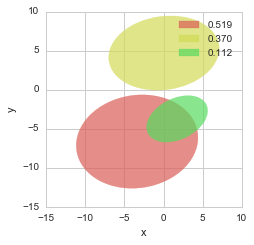

In [48]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm,ax=ax)
# fig_gmm.savefig('foo.pdf')

## 5.2 Goodness-of-fit statistics

In [49]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.014      0.024  5.512183e-09      0.022       0.116

In [50]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y')
fig_gmm = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y')
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUEAAAFBCAYAAADpDh0xAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXu0JGV5Lv7Ure97zwwgKDLKRQTFQXTQoEiCZ1DR328Z
cJgFM2GIlySCYpZi+CFZZuAcGcejOSErmlFQ1AghDERA9JioiEG8oQ5BImYGcXRAYGBue+/efan7
74/qt/qrr7+6dVfv3TW7nrVmzd69q76urq566r087/tKruu6KFCgQIElCnmxD6BAgQIFFhMFCRYo
UGBJoyDBAgUKLGkUJFigQIEljYIECxQosKRRkGCBAgWWNAoSLFCgwJJGQYIFChRY0ihIsECBAksa
BQkWKFBgSaMgwQIFCixpFCRYoECBJY2CBAsUKLCkUZBggQIFljQKEixQoMCSRkGCBQoUWNIoSLBA
gQJLGgUJFihQYEmjIMECBQosaRQkWKBAgSWNggQLFCiwpFGQYIECBZY0ChIsUKDAkkZBggUKFFjS
KEiwQIECSxoFCRYYgOu6cBwHrusu9qEUKDB2qIt9AAUmC47jwLIsdLtdSJLkv16r1aAoyiIeWYEC
40FBggV8dDodNJtNVCoVyLIM13XR6XRg2zYcx4Esy1BV1f+/IMUChwIKEiwA13Vh2zZM04Rt29B1
3Sc9x3EAwLcKLcuC67rQdR2yLENRlIIUC+QaklsEfpY0yP11HAe6rqPdbgu3kyQJiqL4/2S5H06m
S6ggxQJ5REGCSxiWZcG2bQCArutotVoAAEVRUK1WYds2ut2uMEFSkGKBQwUFCS5BuK4bIMB2uw1d
1/2/V6tVqKoaiAnWajXfbaZ/LIgUKWbIkqJhGDAMA9VqFeVyuSDFAhOFIia4xOA4DkzT9Altfn4e
juNAURSUy+VId5gsO6Avo2FJ0bIsWJYFoG8FKoriW4ZEvkVMscAkoSDBJQLWiiMSIsIrl8uo1Wo+
gSUB6w7T+jwpEuES6GdFUSBJUiQplkqlgESnQIFxoSDBJQDDMGBZli97abVaME0TkiShXq+jVCqN
/B5RpMhanuRGs5ZiHCkqigJN0wpSLDAWFCR4iMO2bczOzsKyLExNTaHVasFxHKiqikajEYjdEbII
E/OkaBgGSqWST4aO4wQsxShSNE0T3W4XpmlCURTUarWCFAtkhoIED1Hw7i8ANJtNAF7io1KpJCIR
2sZ13ZFJh2J//PElJUXDMPykS7fbLSzFApmgIMFDEKz2j9xSwCO0RqMBTdMW+Qi9Y1FVNRUp0na0
P28pFqRYYBgUJHiIgbK0gJeIaLVaPnFMT09HZmAXkzSSkCK93mq1ErnPlGQpSLFAFAoSPEQQpf2j
8rc8kYCIFEnMTZ+HtRR54bYkSYFtKNHC6hkLSU4BoCDBQwKs9s9xHMzPz8O2bciyjEajgU6n41tS
SUDxv0nS0ROBy7IsFG7zAm5RNQvbIadUKvmNIohs8/SQKJAdChLMOVjrzzAM31oi7Z8kSRNzc2dJ
qnHucxgpsmAtRRKDF6S49FCQYE5hGAY6nY7v2rVaLRiGAQCo1+sol8uLfIR9LASZRJEiPShYUmTd
aNZSLEhx6aEgwRyCGhu0221UKhVf+6coChqNRmisK84SO5RucpYUy+WyL9wmQnRd139oAOHuc0GK
hz4KEswR+KoLAOh2uwCASqWCarUqvDGLmxU+gUmSBNu2oWkaZFlOHVMkUqTtK5UKKpWKn6EukD8U
JJgT8No/Ij8AaDQamZS+icCKpQ8FsG2+NE3zNZN83XMcKRIZKoriJ53ob5qmFaSYIxQkmANQ/S3g
JULm5+f9m7lSqWROgK7rHjKklxRkKSYhRTbZRGEIXpID9ImT5DgFKU4mChKcYPDav06n41uApVIJ
hmGkurHSENukSWQWGiwp0kNBJN42DMO3CFnhNkuKFHvk57MUpDgZKEhwQsFr/1qtlt8JptFo+IH9
rGUngEeWlAxYykRIIFJjSZHIjzrzsL0U+a7btD8RKEuKlMDhu3MXWDgUJDiBYK0/tvStVCqhVqtB
luVAn744pLU4qPSMf42IYKmDPZ/UKZu3FKNIkc4hhTl0XUe5XA6ItwtLceFQkOAEwbIsNJtNyLLs
d3mm0rdarYZyuezfGMPcIHFWHVkoruv67fVZMibrcDHiXJNskYosxaiu2ywpsp+LtRRpm4IUx4+C
BCcEdPF3u11omgZd12Hb9sjavyRwXTdAuNSzz3EcdLtdWJYVIMWwNvoLcaPmgQiSdN1mzyEA/2fe
UixIcfwoSHCRIer7R64oW/o2CqL2pzkjVGtM84b5fUn2EddGf6FJMQ9I23U7yn22LKsgxYxRkOAi
gtf+dTod/29x2r8sLnh2zGa5XEa1WsXMzEzkPqIbOqoPIGvBTrJLu5AI67oNQGgphj1YWFKk31VV
9ePGBSkmQ0GCiwRW+8dOfQO8rOE4xM/s1DfW/aVa47D5wuy+or/HNTIgGIbhu/hsy6uFxKQSMd91
O621TaELCluwliJVxxSkKEZBggsMXvvX7XZ9C7BSqaDb7Y5N+wcE3d+4eOMwEJGirut+dpknRnLl
WCnJQmDU92E7XGe9TtpJfjzBiSzFghTDUZDgAoJ3f+fn531yaDQaUFU1UA4XhTQXMG1rmibm5+cB
RMcbs9YeKooCy7JQKpWgKEpqKclSRxJSJFiWhXa7Hek+85P8SMS9VEmxIMEFAmv9saVvmqahXq/7
WjMge5eN1uPd38VAVCUGESJPinSTFvAgIkXTNH2LL25oFZ9o0XXdt+DZRMtSQUGCYwZp/xRFQalU
CpS+LYT2j9puAd7NMDU1legCX6gegGn0dUDfmi6yoX2wInZqCpF2kh8Af+bz3NwcHMfxr5VDnRQL
EhwjqG6U2rl3u91A23uKm/FIYgkmIQA2+wvAb/k0yprjRJTbJ+qgcyjIcbKKLbIYZpIfex7pvNMD
iHWfD0VLsSDBMUDU949kDKVSCfV6faw3LJ/9LZfLvsuTJ7CkqGlaYMpcmBxnoTLPk5plFiEtKRIo
ecZO8qNE16FEigUJZgw2+QEgoP1LEotLe+PyN6Mo+0tP8zRrTupNLkmSfw7TDlsaBylOyoMljUWZ
hBSBfsNe0Xk8lEixIMEMQW4bXVS89i9pMmJYAuLFz5T9pZjapBLbsAi7mdmZIrwcZ1zJpzyDP4/U
sIOPLRKSkiIfp5xUFCSYAXjtn67raLfbANK7osNsFyZ+zgJ56izN38yiJAuBrc1eTDnOOGKCWWBU
i5vuiVar5dei//jHP8aRRx6JV77ylYv1sYQoSHBE8Nq/Vqvld1up1+t+M4Q0JJJmW8dxMDc3Fyl+
HkZTOA4sNJGK5Djdbte3zsPkOHlMsoyTTOMeLmGkSA8WIsWf/vSnWLVqVSgJuq6La6+9Fjt37kSp
VMLmzZuxcuVK/+/33Xcftm7dClVVsXbtWqxbty50n8cffxybNm0CALz4xS/G5s2bIcsyNm/ejIce
egj1eh0AvPUyP2NLCLz2j6a+qaqKRqOxINYF3dBZNVsYBybhmEiOoyjeTJBKpRKoYFns7jiTBNd1
I6/dNKMIAO/e+N73vodOp4NKpRK67r333gvDMHDbbbfhF7/4BbZs2YKtW7f6a3ziE5/AnXfeiXK5
jPXr12PNmjXYvn27cJ/rr78eH/7wh7F69WpcffXVuO+++3DOOefg0UcfxU033YTly5f771uQ4BAw
TRPdbte/UdjSt2q16t9gLJJaQUm6OZP7S0jq/iY9Bqo9PZQxTGkaLyMp4CGMFMlIeOyxx3DllVcC
AL75zW/innvuwRvf+Ea84x3vCFxn27dvx1lnnQUAeOUrX4lf/vKX/t9+85vf4MUvfjEajQYA4PTT
T8dPf/pTPPz

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADZCAYAAADlhB+aAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnX1QVOf1x7/LLriWxaIJ+AIGFDUKwRcwaaop44xQbSbN
m2IUDU2l0djEzkRDxKYRTVRMJhk7DTFNxvRnxUlEk3TMZJKmUg1M1CaBBuILiGLkzRdWgbqsEGC5
vz/Ive4ue+/ee/fZ3bu75zPDhGXv89zDhvv1POc5zzk6juM4EARBMCTM3wYQBBF8kLAQBMEcEhaC
IJhDwkIQBHNIWAiCYA4JC0EQzDH42wCCIDyD4zhs3rwZZ8+eRUREBLZt24bx48cL7x85cgS7du2C
wWDAokWLkJ2dLTrm/Pnz2LRpEwAgISEB27ZtQ1hYGMrLy7Fr1y4AQEpKinCNlFEEQQQw//rXv7iC
ggKO4ziuurqaW7NmjfBeX18fl5WVxVksFq63t5dbtGgRd/36ddExv//977nKykqO4ziuoKCAO3z4
MNfV1cU98MADXEdHB8dxHLd7926uvb1d0ibyWAgiwKmqqsIvfvELAMCMGTNw6tQp4b2GhgYkJCTA
ZDIBAGbPno2vv/4a1dXVLscUFxdDp9Oht7cXZrMZUVFR+PbbbzFlyhTs2LEDzc3NyM7OxsiRIyVt
ImEhiACnq6sLUVFRwmuDwYCBgQGEhYUNee8nP/kJLBYLrFar6JhLly7ht7/9LaKiojB16lRUVFTg
q6++wscffwyj0Yjly5dj1qxZSEhIELUpYIWlqqrK3yYQhCTp6emyrvu2+t8YsEWLvh8REYHU1FTR
900mE6xWq/CaFwj+va6uLuE9q9WKn/70p5Jjxo0bh88//xwHDx5EUVERHnjgAaSmpmLUqFEABr2e
2tra4BQWADiwtcLjOSxdFkSZotxfSPPSvApY8qcM2dcO2KIx+o4i0fevNm2UHJ+WloajR49i4cKF
qK6uxpQpU4T3kpKS0NjYiBs3bsBoNKKyshJ5eXkA4HLMmjVrUFBQgISEBERGRiIsLAzJyck4d+4c
Ojs7YTKZUFNTg8cee0zSpoAWFoIggKysLBw7dgxLly4FABQVFeGTTz5Bd3c3srOzsXHjRqxcuRIc
x2Hx4sWIjY11OQYAVq9ejYKCAkRERGD48OHYunUrRo0ahXXr1mHlypXQ6XS4//77MWnSJEmbdBwX
mKebq6qqyGOheTU775I/ZcheClVVVbn1WOTOpRUoQY4gCOaQsBAEwRwSFoIgmEPCQhAEc0hYCIJg
DgkLQRDMIWEhCII5JCwEQTCHhIUgCOaQsBAEwRy/CUtNTQ0ef/xxAEBtbS0yMjKQm5uL3NxcfPbZ
Z/4yiyAIBvjlEOLu3btx6NAhREZGAgBOnTqFlStX4oknnvCHOQRBMMYvHktCQgLefPNN4fXp06fx
xRdfYMWKFXjhhRdw8+ZNf5hFEAQj/CIsWVlZ0Ov1wusZM2bg+eefx759+zB+/Hi88cYb/jCLIAhG
aKIeS2ZmplAmLysrC1u3bpU1ztJlYXJ/VvPQvDQvMYgmhCUvLw8vvvgiUlNTceLECaSkpMgax6Ju
htbretC8wTGvO77qFi/zmOg7M5ihCWHZvHkzXn75ZYSHhyMmJgYvvfSSv00iCMID/CYscXFx2L9/
PwAgOTkZ77//vr9MIQiCMZrwWAhtUd/eLfn+lFHDfWQJEaiQsIQ4vIjYbDroewe/T0odL3p9w8lm
SeEh0SEAEpaQxV4cklLHw2KxODSwEkOp6NhsOkwzqbeTcA/ng97NBw4cQGlpKcLDw/HUU09h3rx5
kjaRsIQQzmLCGldz1ldfdLgveTTsKSsrQ29vL/bv34+amhoUFRUJDdz7+/uxY8cOfPTRRxg2bBiW
LVuG+fPno6qqyuWYnTt3Yv369UhPT8fGjRtx5MgRzJw5EyUlJfjHP/6Bnp4eLFu2DHPnzkV4eLio
TSQsIYC3BUWKsUm3CZ6QvUdDAsMOb/du/u6775Ceng6DwQCTyYTExEScPXsWd911l6hNJCxBivOS
xNeC4greBhIYtni7d3N5ebnLOaQgYQkitCgmriCBYYu3ezcvWLBgyBwjRoyQtInqsQQB9e3dwgOa
lDpe+NI69na62+ImxElLS0N5eTkASPZu7u3tRWVlJWbOnIlZs2a5HLNmzRo0NjYCgNC7OTU1VYjJ
WCwWXLhwAZMnT5a0iTyWAMWfcRPWJKWOF7wX8lyU4+3ezbfffjsef/xx5OTkgOM4rFu3DhEREZI2
Ue/mADtzUmvuEk6GsxQUudvN3p634WQzAPdLI63/f1Pau/lizHui7yeacwKudzN5LAGAvXdiv8sS
jJD3EhyQsGgYV8sdd9H4YIAXFyJwIWHRIMEUP1FLUup41J9sJq8lQCFh0RAkKEOhJVFgookq/U1N
TcjJycGKFSuwZcsWf5nkN1xtFxOgregARhNV+ouKirBu3TrMnj0bhYWFKCsrQ2Zmpj9M8zn2guIv
Tlo60G+zwWDpZzZnatRIJvOESrzlQleL6HuJvjODGX4RFr5K//PPPw9gsEr/7NmzAQAZGRk4fvx4
0AuLPwXlpKVjyM/GxY1gttvUcO6KcA9esDwRmlCIt3Ta5vjbBKb4RViysrLQ2toqvLZPpYmMjAzq
nQ9/xFGchSRp8pgh17D8zO3nt1gsaLtiFWzwRGAo3hI4aCJ4y59RAOSdQ+AJtCr9Ld06AIO5KID6
h1nOuPO2Hxxej4u79ZmKjfeWoMeOGVzyXmq9gW87rwEAJumHKZsjMRqXG647fKZUpV+7aEJYkpOT
8c033+Duu+9GRUUF7r33XlnjAqVKP++l6PWeeynuMll5z8Cg17v0TNTOqxb7ee+c+mP5hHNXcBHK
l0dt+k5c7h3MytV65m2oowlh2bBhA1588UX09fUhKSkJCxcu9LdJzPBVLMV+uaNEUPxB0uQxQhxG
ibiESiA3GNBElf7ExESUlJT4yxSv4QtRCSRBsYe39eS5KwDkx174QO5Y6TNwhJ/RhMcSjLR065gs
fcQIVEFxhvdelNLSTbV0tQzVY/EC3vRUztt+EEQlafKYgBYVnqTJY1xugYteTwmEmoc8FsbwosLv
/LCClYdSYzW7/LmNs0Fv7ZE9z4zIGNU2iKE05kLbz9qFhIUh9p4Kq61bZ0FRM6+zmExJiB1yjdLd
kJrGNpc/Vys4SgO6Y5NuQ9vFTlX3IrwPCQsjWC9/WHgo9oLiSkw8wdV89Y1tDvdUKjJKxSUUMnID
FRIWBrASFW8sd1gLihTO96ppbBOWWHJFRm0wl9AWJCwewkJUWO7w8KLiS0ERY0pCLCxdFly+3i3Y
JVdgyGsJbEhYPMBTUQlWQXGGt4lfKrkTF/JaAh8SFg9RIyreEBRAvqhU9w4NvNr0NqEpvBgzIzwT
rSkJsYrE5eS5K+S1yIBl7+ba2lps3boVer0eERERePXVVzFq1CjhPqtWrUJmZiYee+wxSZtIWFRS
397tkaj4W1CmxTk+2HLOClW3OgqSGqFRIi6A8i3oUIRl7+bt27dj06ZNuPPOO1FaWop33nkHBQUF
AIA///nPsnclSVhUoLaiGQtROcdZhXwTFoKiBPuxta1mh3mViIxccVGyJAplr4VF7+bTp08DAHbu
3Inbb78dwKAoDRs2eAr9888/R1hYGO677z5ZNpGwKERNXMVTQbH3TuJjTYryTfiH3xNBcYWYyMgV
GCWeC3kt0rDo3azX6zEwMCCIyn//+1+899572LdvH+rr6/HJJ5/gL3/5C958801ZNpGwKMCXoiKW
1Ca3Voi3BMUV9vfgl0tyBEaOuISK11LbKfE7/kR6LOvezZ9++inefvttvPPOOxg5ciR2796NtrY2
5ObmorW1FRE

In [51]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

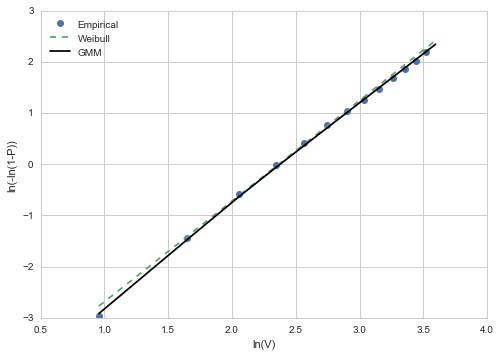

In [52]:
x = linspace(0, max_speed, 15)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label = 'Empirical')

# 2. Weibull distribution
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y = array(zip(*y_)[0])
plot(log(x), log(-log(1-y)),'-', color='black', label = 'GMM')

plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

Direction Distribution Comparison


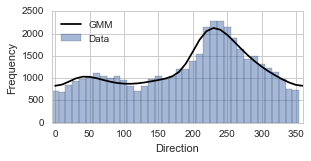

In [53]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y = array(zip(*y_)[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
title='Direction Distribution Comparison'
plt_configure(xlabel='Direction',ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4.5,2))
dir_fig = plt.gcf()
print title

Speed Distribution Comparison


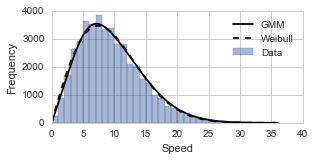

In [54]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y = array(zip(*y_)[0])*len(df.speed)/0.02
plot(x, y,'-', color='black', label='GMM')

# 2. Observation
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')

# 3. Weibull
y_weibul = sp.stats.exponweib.pdf(x, *weibull_params)* len(df.speed)
plot(x, y_weibul, '--', color='black', label='Weibull')   
title='Speed Distribution Comparison'
plt_configure(xlabel='Speed',ylabel='Frequency',legend=True, figsize=(4.5, 2))
plt.gca().set_ylim(bottom = 0)
plt.locator_params(axis='y', nbins=5)
print title

In [55]:
%%time
incre = SECTOR_LENGTH 
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# #This R square is compute as in paper 
# # Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# # http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print true_R_square(density_collection)

0.904448833917
CPU times: user 652 ms, sys: 51.1 ms, total: 703 ms
Wall time: 5.82 s


## 5.3 Sectoral Comaprison

In [56]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        direction_prob = integrate.nquad(f, [[0, inf],
                                             [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)
        
        fig = plt.figure(figsize=(13,1.3))
        x = linspace(0, sub_max_speed, 20)
        # 1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        # 1.1. Data Histogram
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')             
        # 1.2. Model Distribution
        y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], 
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                                 for x_ in x]
        y_gmm = array(zip(*y_gmm_)[0])/direction_prob[0]/0.02
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        # 1.3 Weibull Distribution
        y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        # 2.1. Empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_ecdf = ecdf(x)
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_cdf_gmm = array(zip(*y_)[0])/direction_prob[0]
        # 2.3 Weibull
        y_cdf_weibull = sp.stats.exponweib.cdf(x, *weibull_params)      
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 3. Weibull Comparison
        ax3 = fig.add_subplot(1,3,3)
        plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
        plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
        plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
        plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        plt.gca().set_xlim(right = log(max_speed+1))
        
        print '%s (%s - %s) degree' % (angle, start_angle, end_angle)     

        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'],bins=bins, normed=True)
        density_expected_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                    for x_ in bins[:-1]]
        density_expected_gmm = array(zip(*density_expected_ )[0])/direction_prob[0]
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.exponweib.cdf(bins[1:], *weibull_params) - sp.stats.exponweib.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        diff, diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], 
                               diff_weibull.max(), x[diff_weibull.argmax()], R_square_gmm, R_square_weibull])
        curves = {'angle': angle, 'data_size': data_size, 'weight': direction_prob[0], 
                  'x': x, 'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf}
        curve_collection.append(curves)
        
        plt.show()
        print 'data size:', len(sub_df), 'weight', len(sub_df)/len(df)
        print 'GMM', 'Weibull'
        print 'R square', R_square_gmm,  R_square_weibull
        print 'max diff:', diff.max(), diff_weibull.max(), 'speed value:', x[diff.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()]
        print ' '
    return max_diff_array, curve_collection

5.0 (-5.0 - 15.0) degree


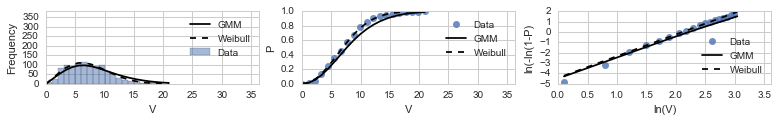

data size: 1035 weight 0.0237238407408
GMM Weibull
R square 0.902315536124 0.960717656315
max diff: 0.100405643221 0.020340349343 speed value: 9.93551049137 y gmm 0.684135419581
 
25.0 (15.0 - 35.0) degree


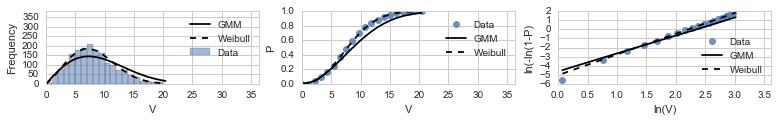

data size: 1789 weight 0.0410067160245
GMM Weibull
R square 0.841008729381 0.978718908485
max diff: 0.125222591583 0.0130627438931 speed value: 10.7471529384 y gmm 0.651747782928
 
45.0 (35.0 - 55.0) degree


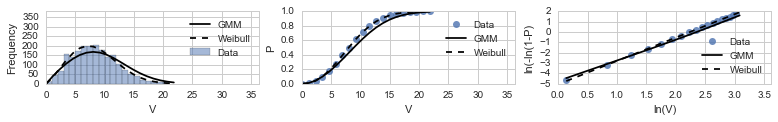

data size: 2002 weight 0.0458890136842
GMM Weibull
R square 0.895270771497 0.976952187769
max diff: 0.0960402801311 0.0077377655165 speed value: 11.4852621119 y gmm 0.70266101857
 
65.0 (55.0 - 75.0) degree


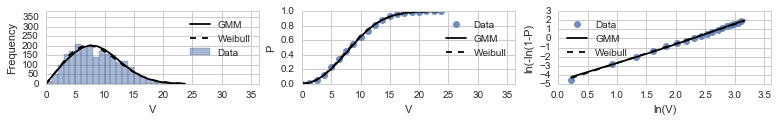

data size: 2170 weight 0.0497398400073
GMM Weibull
R square 0.941722305153 0.955684070852
max diff: 0.0356902610531 0.0209698937681 speed value: 7.48903354556 y gmm 0.422374255076
 
85.0 (75.0 - 95.0) degree


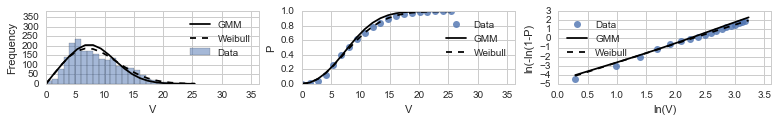

data size: 2057 weight 0.0471497008733
GMM Weibull
R square 0.870017774502 0.90962285009
max diff: 0.0662985642941 0.0350394804536 speed value: 13.3696332251 y gmm 0.903926177323
 
105.0 (95.0 - 115.0) degree


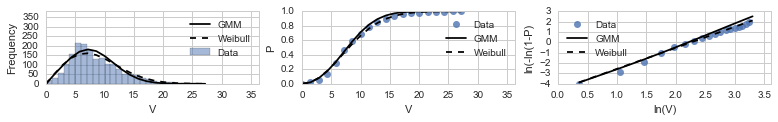

data size: 1777 weight 0.0407316570014
GMM Weibull
R square 0.921799783334 0.915760710434
max diff: 0.0520620925159 0.0378760468406 speed value: 14.3040523733 y gmm 0.941763837029
 
125.0 (115.0 - 135.0) degree


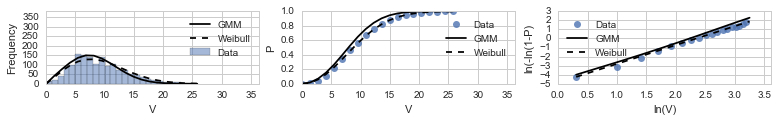

data size: 1540 weight 0.0352992412955
GMM Weibull
R square 0.901531697954 0.927994850972
max diff: 0.0865112996952 0.0233005817946 speed value: 10.8719897245 y gmm 0.755342468526
 
145.0 (135.0 - 155.0) degree


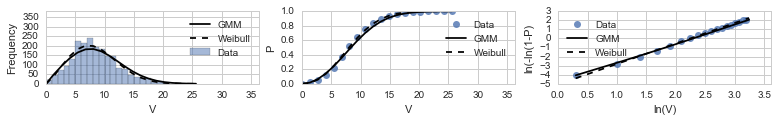

data size: 2037 weight 0.0466912691682
GMM Weibull
R square 0.92597099564 0.957217084595
max diff: 0.0545329855467 0.0287272114078 speed value: 9.43360633184 y gmm 0.594951550536
 
165.0 (155.0 - 175.0) degree


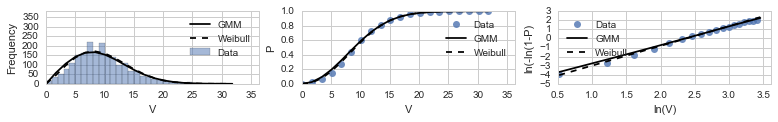

data size: 2028 weight 0.0464849749009
GMM Weibull
R square 0.936276623251 0.950428779826
max diff: 0.0488718054545 0.0268313408051 speed value: 5.02223381026 y gmm 0.195814606243
 
185.0 (175.0 - 195.0) degree


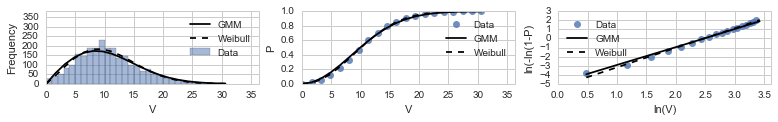

data size: 2424 weight 0.0555619226626
GMM Weibull
R square 0.93122881803 0.956898570875
max diff: 0.0377730758588 0.0164319106501 speed value: 6.44874752714 y gmm 0.255182316783
 
205.0 (195.0 - 215.0) degree


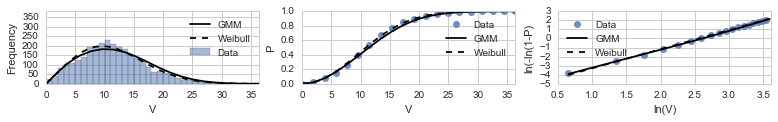

data size: 2915 weight 0.0668164210237
GMM Weibull
R square 0.955356223327 0.973431913188
max diff: 0.0484672800379 0.0235612507028 speed value: 15.3439003134 y gmm 0.722030147063
 
225.0 (215.0 - 235.0) degree


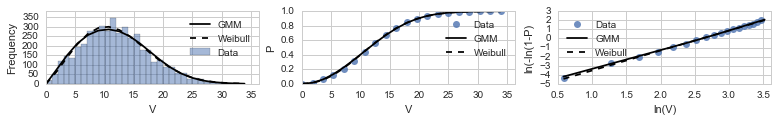

data size: 4440 weight 0.10177183854
GMM Weibull
R square 0.966142298325 0.970482001914
max diff: 0.0224338045128 0.0131702049139 speed value: 7.13596452036 y gmm 0.227613984693
 
245.0 (235.0 - 255.0) degree


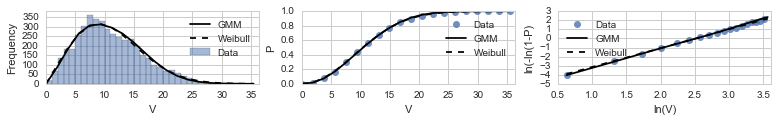

data size: 4422 weight 0.101359250006
GMM Weibull
R square 0.97736592386 0.979706051508
max diff: 0.0188368838899 0.0138647173 speed value: 9.32804503386 y gmm 0.423044617693
 
265.0 (255.0 - 275.0) degree


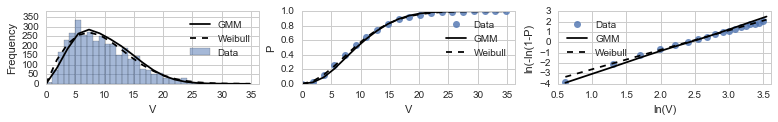

data size: 3553 weight 0.0814403924175
GMM Weibull
R square 0.936559350782 0.957321468102
max diff: 0.0572691412301 0.0198973433827 speed value: 5.49929266092 y gmm 0.205888753507
 
285.0 (275.0 - 295.0) degree


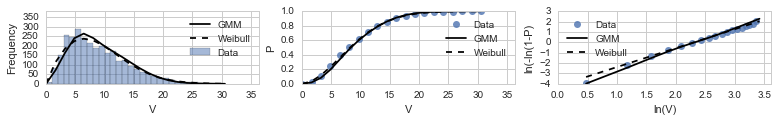

data size: 2924 weight 0.067022715291
GMM Weibull
R square 0.939577568158 0.950049376394
max diff: 0.0551686211021 0.0310525974109 speed value: 6.43202952212 y gmm 0.335392254411
 
305.0 (295.0 - 315.0) degree


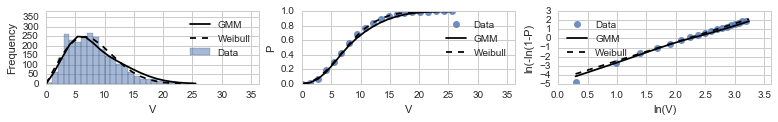

data size: 2550 weight 0.0584500424049
GMM Weibull
R square 0.940609128025 0.957137907517
max diff: 0.0538693099209 0.0208766492016 speed value: 12.0967607043 y gmm 0.788483631256
 
325.0 (315.0 - 335.0) degree


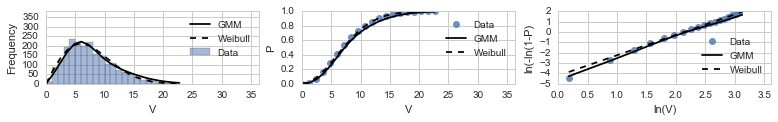

data size: 2112 weight 0.0484103880624
GMM Weibull
R square 0.962848274533 0.965034518787
max diff: 0.0470193535401 0.0210708441873 speed value: 4.79571504138 y gmm 0.244647313127
 
345.0 (335.0 - 355.0) degree


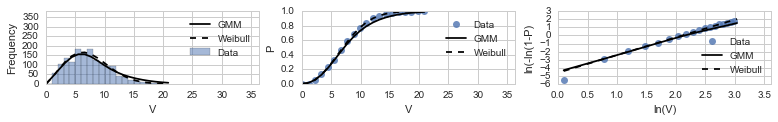

data size: 1494 weight 0.0342448483737
GMM Weibull
R square 0.933615603383 0.955269835604
max diff: 0.0658712850297 0.0123471084529 speed value: 12.0846515122 y gmm 0.84443661323
 
CPU times: user 46.1 s, sys: 337 ms, total: 46.4 s
Wall time: 46.4 s


In [57]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
max_diff_array, curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

0.934408072238 0.958270565615


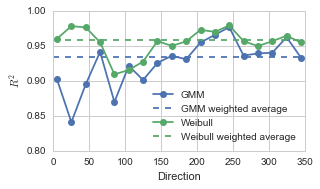

In [58]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull', 'r_square_gmm', 'r_square_weibull'])  

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$")
print gmm_mean, weibull_mean

0.0528229826338 0.0207905779874


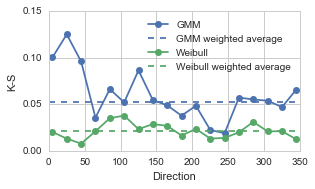

In [59]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.gmm, diff_df.weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S")
ylim = max(plt.gca().get_ylim()[1],0.15)
plt.gca().set_ylim(top=ylim)
print gmm_mean, weibull_mean

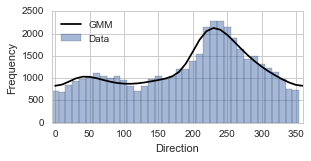

In [60]:
# Compare direction weight with previous figure
display(dir_fig)

### 5.3.1 Data Variability, by Bootstrap (Resampling)

In [61]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = rebinned_angle

In [62]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
weibull_params = sp.stats.exponweib.fit(sub_df.speed, floc=0, f0=1)

25.0 (15.0 - 35.0) Degree Speed Distribution
0.120298537198 10.0 0.599656745082


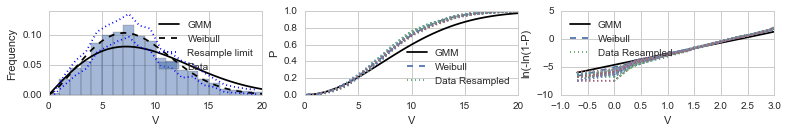

In [63]:
fig = plt.figure(figsize=(13,1.5))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

x = arange(0, sub_max_speed, 0.5)

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_gmm_)[0])/direction_prob[0]/0.02  
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(zip(*y_gmm_cdf_)[0])/direction_prob[0]
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_gmm_cdf,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color = 'black',label='GMM')

# 3. Weilbull 
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_weibull_cdf,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
        plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel='V',ylabel='ln(-ln(1-P)',legend={'loc':'best'})

print '%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle)
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
plt_configure(ax=ax1, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)

diff = abs(y_ecdf - y_gmm_cdf)
print diff.max(), x[diff.argmax()], y_gmm_cdf[diff.argmax()]

### 5.3.2 Time Variability

In [64]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))
 
x = arange(0, sub_max_speed, 0.5)

# 1. GMM
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
y_gmm = array(zip(*y_gmm_)[0])/direction_prob[0]/0.02
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],
                         [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(zip(*y_gmm_cdf_)[0])/direction_prob[0]

ax2.plot(x, y_gmm_cdf,'-', color='black', label = 'GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color='black',label='GMM')

# 2. Weibull
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.exponweib.cdf(x, *weibull_params)
ax2.plot(x, y_weibull_cdf,'--', label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print '%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle)
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
ax1.set_zlim(bottom = 0)
align_figures()

25.0 (15.0 - 35.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAFBCAYAAAD69Z+AAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmcHHWd//+sq685E3ITjoQkIIKEBBYUorCAGy51gazc
+sPVL+CBqLgLHoAuRBdUPIgiAgIi4RSRJYAhXAaEJIRAOAKEJCQQjsxM5uizrt8fPZ+a6prqmZ6Z
7pnumc/z8Ygy3XV2VX1e9X5/3ofiuq6LRCKRSCSSPlFH+gAkEolEIqkFpGBKJBKJRFICUjAlEolE
IikBKZgSiUQikZSAFEyJRCKRSEpACqZEIpFIJCUgBVMikUgkkhKQgimRSCQSSQlIwZRIJBKJpASk
YEokEolEUgJSMCUSiUQiKQEpmBKJRCKRlIAUTIlEIpFISkAKpkQikUgkJSAFUyKRSCSSEpCCKZFI
JJJhY+vWrXzjG9/g1FNP5Qtf+ALnnnsub775Jr/+9a/Zd999+fDDD71lW1tb2W+//bjvvvt45513
2Geffbj++usLtnfuuedy9tlnD8uxS8GUSCQSybCQyWQ4//zz+c///E+WLl3KzTffzFe/+lV+9KMf
oSgKM2bMYNmyZd7y//d//8e0adO8v3fffXceeeQR7++dO3fy9ttvD9vx68O2J4lEIpFUDRdddBF3
3XVXWbe5aNEirrrqqqLfr1ixgkMPPZSPfexj3mf7778/t9xyC7/5zW849thjWbZsmWcxPv744xx5
5JHesuPGjWPcuHG89dZbzJw5k2XLlnHssceyatWqsp5HMaSFKZFIJJJhYdu2beyxxx7e3+effz5n
nXUWCxcu5P3332fChAkkEgm2bdvG22+/zdSpU4lGowXbOP744/m///s/AB599FGOPvroYTt+aWFK
JBLJGOSqq67q0xqsBFOnTmX9+vXe30uWLAHg85//PJZloSiKJ4imaXLiiSfyj3/8w1teURSOPvpo
Tj/9dE466SQmTpzYS1AribQwJRKJRDIsHHXUUTzzzDO8+OKL3mdbtmzhvffeQ1EUAD796U/z6KOP
8vzzz3PIIYf02kY8HmfGjBlcddVVnHjiiQC4rjssxy8tTIlEIpEMC4lEgt/97ndcffXVfPjhh1iW
ha7rXHLJJbzxxhsA1NfXM2XKlALXbZATTzyRSy+9lF/84hds2rTJE9tKo7jDJc0SiUQikdQw0iUr
kUgkEkkJSMGUSCQSiaQEpGBKxiyu62JZ1rAFDEgkktpGBv1Ixhyu62LbNqZpks1m0TQNVVVxHAfX
dYnFYhiGMWyBBBKJpDaQgikZM7iuSzqdpquri1gsRiQSQVXzThbHcUin09i2jeu6ZDIZFEVBVVXv
n6ZpaJomhVQiGaNIwZSMeoRFaVkWlmV5/53L5bAsy7Mw/a5ZIYqO43iWp/hcCKn4f13Xvb8lEsno
Rc5hSkYtYo4ym816VUQcxwEgm81imqa3TC6X875LpVKkUikymYwnqn4x9QtwNpslmUzS2dlJV1cX
qVSKdDpNLpfzrFWJRJLni1/8Ii+99BIApmly0EEHceONN3rfn3XWWbz22mu91nvqqae46667eOed
d/j85z9f8v4OP/xwb7ubNm0a4tFLC1MyCvELGuStQsuySKfTmKYJgKqqJBIJTyQdx/FEUwir+M6P
sEb9/4RlKfYLeGIcXE64dYUrWCIZSxx22GGsWbOG/fffn9WrV7NgwQKeeOIJzjnnHHK5HNu3b2ef
ffbptd6CBQsAeOedd0bUkyOfWsmoIcyitG2bzs5OOjo6ME0TTdMAiEajGIbhiZlwq0K+9FZdXR2J
RMJbTsxd+oOF0uk0yWSSZDJJOp32rFYhmv75UcuyME3Tm0Pt7Oz01stkMjJaVzIi7Lln+L9yLR/k
E5/4BKtXrwbgySefZNGiRZ53Zu3atRx88MGsWrWK008/nbPOOovvfe97WJbFX/7yF372s58B0NLS
wvnnn8/nP/95fvvb3wJw8cUXezVnn3rqKS6++OLSD2oASAtTUvMIy064QMMsSl3XicfjuK5LV1dX
v9v0z1UG9yWsT/8/sf/gNoIWqdguUGDF5nK5gnXEvmWgkWQ0se+++/LWW28BsGrVKr71rW/x8Y9/
nKeffpoNGzZw+OGH8/3vf5/bb7+d8ePH88tf/pK//OUv6LruPQPpdJqrrrqKeDzOGWecUdD+q9JI
wZTULGFCadt2qFCKB058Plj8btXgsQjh9AupcAv7Cbp0g0IqhDcYaCS+MwyDaDQqA40kQ2bz5sou
H0RRFPbZZx+efPJJJk6ciGEYLFiwgMcff5wNGzZwxhln8IMf/IBvfvObuK5LLpfjE5/4BLvvvru3
jb333pu6ujog30tzc+CgKumpkYIpqTkGI5Rh2ygnYULqum5Ri3Qw86OWZZHJZIhEIpimWWCF+iN2
/QIrkVQbH//4x7nuuus44YQTAJg/fz7XXnstqqoybtw4pk6dypIlS6ivr2fFihXU1dXx7rvveutv
3LiRdDqNYRi8+OKLfP7zn+eZZ57hww8/BOCVV16p2LFLwZTUDOUQyr7wi1M56MutK86lFLeuEE//
+uJvIaT+4/avoygKuq5Lt66kajjssMP44Q9/6PXiNAyDpqYmPvKRj6AoCpdccglf+cpXcByHhoYG
fvrTnxYIZnNzMxdeeCGtra0cd9xx7LXXXixatIhLLrmEv/3tb+wZMqlarntfdiuRVD2lzFFqmkYi
kehXKC3LoqOjg1gsRiKR8OYOoSfVJB6P93K5DgfFrNGwR7S/+dHgdsU6shCDRDJ4pIUpqVpKsSg1
TSMej4+KUnb9zY+apulF//otSz/9zY/KQgwSyeCRgimpOooJpSgkAEMXylpyrAghFSJpGAaGYQxo
flRYlP3lj7quSzab9dYJWqRSSCVjGSmYkqpBpHwIt6goiC4q58DosiiHwkDnR8OENOiiLSak/opF
wflRTdMGNV8skdQiUjAlI45/YBZJ/NFolFQqVXahHO0D+0jmj4rlXNdF13Uikcio/70lYwspmJIR
I8z1Kujo6AAqZ1H6Laage7aW3LWlMhz5o2I7IuRfdIPxz4/KQCNJLSMFUzLshAmlcL2KgXokXK9j
cRAvR/6of34z2PElOD/qXyesvu5YvAaS2kEKpmTY6Eso/a4913Wpq6tD18t/e8oBuX/KMT9qmiaO
4wyoUL3fFSwL1UuqESmYkopTilAKi1LkQkphqz5KmR8V/UaBAc2P+gvVF5sflYUYJCONFExJxRiI
UArX61BrvQ7k2CTlwW8NihSgSCSCYRhlnR+VheolI40UTEnZKVUoY7FY0UhKKWi1T7nnR4NuXShe
qF4WYpBUAimYkrJRTCgzmUxBMnw8Hi8qlJUe1OSgObL0Nz8aZpEONn9U/Lf/3gtapFJIJQNBCqZk
yJRDKMO2WeljDlLu4uuS0vELqT/Yq5z5o/5ygrlcjlwu53k5ZCEGSSlIwZQMmkoIpRyoahu/a7Qc
VCp/1P9S1F+gkZwflQikYEoGTCWEMmwfEkkxyjE/Cj0pLWHzo7JQvSSIFExJyQiXlhhEKiGUlaYa
j0lSHgYyP1os9WUo86OyUP3oRwqmpF/EINHa2orjOIwbNw7XdUmlUmUXyuEaYBzH8Qq9i0FSWBLS
uh1dhM2PinzfaDQKUJb5UVmofvQjBVNSlLBBwHVdkslkxS3KSomWcM05jkMul/OsZL/LLpfLYZpm
n5aGpLYR95ewBoPfVTp/VM6P1iZSMCW9CJujFIMI5N/OKyWUlRo0hOs4k8l4n9XV1XktxFzXxTTN
gipDYZZGfwOkpLYoltpU6fzR4PyoWEcWqq9upGBKPIoJpd/1CpBIJIhGoxV9kMtlYQaFUgikqqpE
o1Esy/IET9M

### 5.3.3 Adjacent Sector Variability

In [65]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [66]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('angle == @angle%360').T.to_dict()
    curves = curves[curves.keys()[0]]
    data_size, x =  curves['data_size'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print max_diff_angle
print 'GMM, Weibull, Histogram'
align_figures()

25.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAFBCAYAAAD69Z+AAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXe8FPW9//+atv00BKRzBBE4iCKIioglIfmJxhQNUYgk
3pAYokYjN+YbNOqNMdckmmuKYEi8JpEYBWMAC1hAUVRUbIAIXKX3cuBsL9N+f+z5zJmdM7tny8xs
+zwfDx8Je3bnM/Xzmnf9MKqqqqBQKBQKhZITttw7QKFQKBRKNUAFk0KhUCiUPKCCSaFQKBRKHlDB
pFAoFAolD6hgUigUCoWSB1QwKRQKhULJAyqYFAqFQqHkARVMCoVCoVDygAomhUKhUCh5QAWTQqFQ
KJQ8oIJJoVAoFEoeUMGkUCgUCiUPqGBSKBQKhZIHVDApFAqFQskDKpgUCoVCoeQBFUwKhUKhOMbe
vXtx880345prrsG3v/1tzJkzB5999hn++Mc/oq2tDUePHtW+e/z4cZx++ulYtmwZ9u/fj1GjRuEv
f/lLxvbmzJmDb33rW47sOxVMCoVCoThCIpHADTfcgO9+97t48skn8fe//x033ngj7rnnHjAMg1NO
OQUrV67Uvv/8889jwIAB2r+HDBmCl156Sft3R0cH9uzZ49j+846NRKFQKJSK4bbbbsNTTz1l6Tan
T5+O+++/P+vfX3nlFZx33nk444wztM/Gjh2Lxx57DA899BCmTZuGlStXahbjmjVrcMkll2jfbWlp
QUtLC3bs2IFhw4Zh5cqVmDZtGtavX2/pcWSDWpgUCoVCcYR9+/Zh6NCh2r9vuOEGzJo1C5deeikO
Hz6M3r17w+fzYd++fdizZw/69+8Pt9udsY3LL78czz//PABg9erVmDp1qmP7Ty1MCoVCqUPuv//+
nNagHfTv3x8ff/yx9u8FCxYAAK6++mpIkgSGYTRBFEURV1xxBd544w3t+wzDYOrUqZg5cyauvPJK
9OnTp5ug2gm1MCkUCoXiCJ///Oexbt06bNy4Ufts9+7dOHToEBiGAQB88YtfxOrVq/HBBx/g3HPP
7bYNr9eLU045Bffffz+uuOIKAICqqo7sP7UwKRQKheIIPp8Pf/rTn/DAAw/g6NGjkCQJPM/j9ttv
x6effgoACAQC6NevX4br1sgVV1yBu+++Gw8++CB27typia3dMKpT0kyhUCgUShVDXbIUCoVCoeQB
FUwKhUKhUPKACialblFVFZIkOZYwQKFQqhua9EOpO1RVhSzLEEURyWQSHMeBZVkoigJVVeHxeCAI
gmOJBBQKpTqggkmpG1RVRTweRyQSgcfjgcvlAsumnSyKoiAej0OWZaiqikQiAYZhwLKs9h/HceA4
jgophVKnUMGk1DzEopQkCZIkaf8/lUpBkiTNwtS7ZokoKoqiWZ7kcyKk5H95ntf+TaFQahcaw6TU
LCRGmUwmtS4iiqIAAJLJJERR1L6TSqW0v8ViMcRiMSQSCU1U9WKqF+BkMoloNIpwOIxIJIJYLIZ4
PI5UKqVZqxQKJc11112HTZs2AQBEUcTZZ5+NRx99VPv7rFmzsHXr1m6/W7t2LZ566ins378fV199
dd7jXXDBBdp2d+7cWeLeUwuTUoPoBQ1IW4WSJCEej0MURQAAy7Lw+XyaSCqKookmEVbyNz3EGtX/
RyxLMi4ATYyN3yNuXeIKplDqicmTJ+P999/H2LFj8d5772HKlCl47bXX8J3vfAepVAoHDx7EqFGj
uv1uypQpAID9+/eX1ZNDn1pKzWBmUcqyjHA4jFAoBFEUwXEcAMDtdkMQBE3MiFsVSLfe8vv98Pl8
2vdI7FKfLBSPxxGNRhGNRhGPxzWrlYimPj4qSRJEUUQwGMThw4fR0dGh/S6RSNBsXUpZaG01/8+q
7xs5//zz8d577wEAXn/9dUyfPl3zznz44YeYOHEi1q9fj5kzZ2LWrFm44447IEkSli5dit/+9rcA
gPb2dtxwww24+uqr8fDDDwMA5s2bp/WcXbt2LebNm5f/ThUAtTApVQ+x7IgL1Myi5HkeXq8Xqqoi
Eon0uE19rNI4FrE+9f+R8Y3bMFqkelHUW7GpVCrjN2RsmmhEqSXa2tqwY8cOAMD69esxd+5cTJo0
CW+99Ra2bduGCy64AD/72c/wxBNPoFevXvj973+PpUuXgud57RmIx+O4//774fV68c1vfjNj+S+7
oYJJqVrMhFKWZVOhJA8c+bxY9G5V474Q4dQLKXELG0mlUhliSgQagCa8NNGIYje7dtn7fSMMw2DU
qFF4/fXX0adPHwiCgClTpmDNmjXYtm0bvvnNb+LOO+/Ej370I6iqilQqhfPPPx9DhgzRtjFy5Ej4
/X4A6bU0dxl2yk5PDRVMStVRjFCabcNKzIRUVdVuFikRUDOLNN/4qLHsRW+RkuOlQkqpVCZNmoSF
CxfiS1/6EgBgwoQJmD9/PliWRUtLC/r3748FCxYgEAjglVdegd/vx4EDB7Tfb9++HfF4HIIgYOPG
jbj66quxbt06HD16FADwySef2LbvVDApVYMVQpkLvThZgZlbl8Q5yRp++bh1jSJK/iP7SkRYv9+i
KILnebjdbvA8T926lIph8uTJuOuuu7S1OAVBQFNTE0aPHg2GYXD77bfj+uuvh6IoaGhowK9//esM
wWxubsatt96K48eP47LLLsPw4cMxffp03H777Xj22WfRahJUterep6uVUCqefGKUHMfB5/P1KJSS
JCEUCsHj8cDn82mxQ6BLzLxebzeXq1WQMTweD3g+8301W3zU7BE1i48SgVYUBbFYDDzPw+PxZLh2
aSMGCqV4qIVJqVjysSg5joPX662JVnZWxEf1blzyPb2LljZioFCKhwompeLIJpSkkQBQulCWy7FS
zL7mGx811o4SSxOAZlHmEx9NJpPab4wWKRVSSj1DBZNSMZCSD+IWJQ3RSeccoLYsylLIVfZCXi7I
383ElGzDLDZqFFJ9xyL9b4C0qJJ6Vgql1qGCSSk7+omZFPG73W7EYjHLhbLWRVYvohzHwePxACi9
ftTMrUsaOBibQND4KKVWoYJJKRtmrldCKBQCYJ9FqbeYjO7ZWsyDsyo+mq0JA9A9Pqr/DW3EQKkF
qGBSHMdMKInrlUzU5XC91uMkXmh81Ky/LunBm098lJCtv249XgNK9UAFk+IYuYRS3xpOVVX4/f5u
ZRdWQCfknskVHyXXkFih5DNjB6V846NAV6N6vSuYNqqnVCJUMCm2k49QEouS1ClSYas8jELKMAxS
qRTcbne35KJC46P6RvXG/rpkOyRWShsxUMoFFUyKbRQilMT1Wmqv10L2jWINdsRHjY0Y9CvN0Eb1
lHJBBZNiOfkKpcfjgcvlcqTXK8V5rIiP6t2xJKFIf7/QRvUUJ6GCSbGMbEKZSCQyiuG9Xm9WobR7
UqOTZnnpKT5qZpESUqkUUqlUQfFRYyMGo0VKhZRSCFQwKSVjhVCabdPufTZidfP1WsfK86QXUn2y
F1mZRZZlzVIttn7UrFE9bcRAKQQqmJSisUMo6dt+9WHnNSOCJssyXC6XJppWxUcBZCQpxeNxrWk9
bcRAMUIFk1Iwdgil2RgUSjasio/qLVK91QnQRvWU7lDBpOQNcWnpky+sFkq7qcR9olhDMfFRMyEl
ViptVE8xQgWT0iNkkjh+/DgURUFLSwtUVUUsFrNcKJ2aYKgFWz2Ueq1yxUeNdaPkZdCsEUNP8dFc
jerJ74tZ2JxSOVDBpGTFbBJQVRXRaNR2i9IpQTPrJesEVLALx2qhMbp1JUlCIpHQmiNYGR8FMutH
yTPl9XppI4YqggompRtmMUryNg4AyWTSNqF0YtLINoYTWbJ0Uqx87IiPGt2zoihCkqQMFzJtVF/5
UMGkaGQTSr3

# 6. Result Variability & Cross-Validation

In [67]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

## 6.1 Variability of the Result

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.513  -3.316  -6.779  7.804  5.942  0.084
2  0.367  -0.086   4.721  7.144  4.711  0.145
3  0.120   1.885  -3.591  4.022  3.063  0.372

GMM Plot Result
0.512982197404 [[-3.31615506 -6.7792136 ]] [ 5.89312197  7.84042965] -81.5556944284
0.366781361559 [[-0.0857552   4.72074204]] [ 4.62581076  7.19975666] -80.6775435966
0.120236441037 [[ 1.88488361 -3.59128503]] [ 2.65912338  4.29976047] -63.2626954039


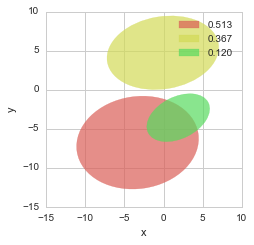

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.991  0.014      0.027  5.031816e-09      0.021       0.111

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.014      0.027  5.615867e-09      0.022       0.117

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.798  -2.769  -2.589  7.544  8.454   0.164
2  0.120   1.817  -4.085  4.119  3.115   0.358
3  0.081   3.263   5.308  4.494  3.116  -0.003

GMM Plot Result
0.798450698176 [[-2.76922344 -2.58871059]] [ 7.17223679  8.77094554] 152.414708066
0.120249235319 [[ 1.8173897 -4.085183 ]] [ 2.73525667  4.38064378] -64.1646318476
0.0813000665049 [[ 3.26255391  5.30823733]] [ 3.11597974  4.4944421 ] -90.2563007838


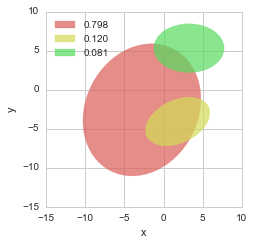

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.991  0.011      0.010  5.143737e-09      0.021       0.112

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.011      0.010  5.409626e-09      0.021       0.115

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.802  -2.642  -2.778  7.626  8.379   0.160
2  0.114   1.548  -4.102  3.895  3.031   0.390
3  0.085   2.961   5.393  4.630  3.185  -0.009

GMM Plot Result
0.801626381788 [[-2.6415473  -2.77840722]] [ 7.23435653  8.71983505] 150.282398012
0.113518184943 [[ 1.54843257 -4.10164331]] [ 2.58695796  4.20331186] -61.5086326605
0.0848554332685 [[ 2.96145904  5.39300855]] [ 3.18483306  4.63018569] -90.7069874248


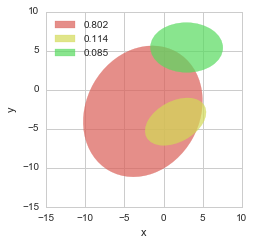

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.992  0.012      0.010  4.629049e-09      0.019       0.106

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.013      0.011  5.541984e-09      0.022       0.116

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.502  -3.178  -6.938  7.843  5.618  0.102
2  0.378  -0.397   4.684  7.267  4.593  0.181
3  0.121   1.810  -3.499  3.938  3.058  0.391

GMM Plot Result
0.501702880428 [[-3.17804792 -6.93818525]] [ 5.55885733  7.88470614] -81.660093267
0.377680130423 [[-0.39730865  4.68403437]] [ 4.47082317  7.34289018] -79.5800179041
0.120616989149 [[ 1.80965982 -3.4993493 ]] [ 2.60777894  4.24981227] -61.5733607034


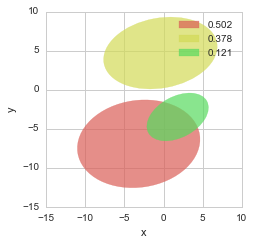

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.014      0.035  5.752946e-09      0.022       0.118

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.018      0.036  5.783445e-09      0.022       0.119

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.504  -3.283  -6.757  7.801  5.910  0.103
2  0.381   0.001   4.577  7.118  4.712  0.115
3  0.116   1.596  -3.845  3.966  2.910  0.366

GMM Plot Result
0.503612427146 [[-3.28312791 -6.75733162]] [ 5.83885967  7.85432207] -79.9627236146
0.380756815838 [[  1.30151041e-03   4.57661948e+00]] [ 4.65668249  7.15451188] -82.3930101122
0.115630757016 [[ 1.59625472 -3.84542847]] [ 2.55536947  4.20375583] -65.3316249366


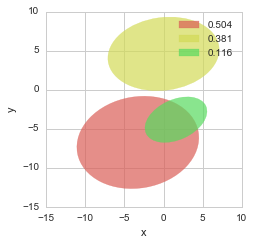

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.016      0.029  5.804524e-09      0.022       0.119

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.016      0.027  5.705847e-09      0.022       0.118

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.535  -3.547  -6.511  7.780  6.174  0.088
2  0.357   0.137   4.748  6.916  4.719  0.093
3  0.108   1.753  -3.850  3.835  2.861  0.311

GMM Plot Result
0.535486018233 [[-3.54732799 -6.51059567]] [ 6.11142318  7.82986411] -79.6529683456
0.356629518388 [[ 0.13666632  4.74813551]] [ 4.68165912  6.9412716 ] -83.331751322
0.107884463378 [[ 1.7526658  -3.85000735]] [ 2.59367888  4.0205851 ] -66.858577151


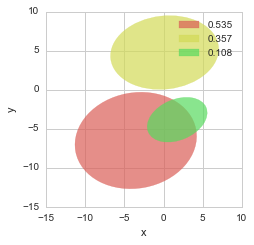

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.013      0.022  5.492791e-09      0.022       0.116

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.013      0.023  5.664937e-09      0.022       0.118

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.449  -3.361  -7.537  7.829  5.528  0.112
2  0.440  -0.360   4.036  7.303  5.082  0.153
3  0.111   1.612  -3.840  3.849  2.951  0.334

GMM Plot Result
0.448911828156 [[-3.36130129 -7.53660303]] [ 5.46039873  7.87626747] -81.2589742573
0.440290366132 [[-0.36006663  4.03590602]] [ 4.97050364  7.37912646] -78.7936316071
0.110797805712 [[ 1.61168605 -3.84035428]] [ 2.62546363  4.07817364] -64.4131790938


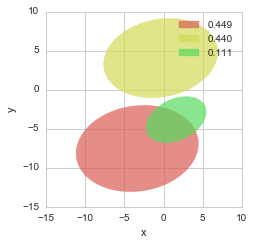

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.014      0.021  5.346828e-09      0.021       0.114

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.013      0.021  5.681621e-09      0.022       0.118

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.510  -3.407  -6.600  7.966  6.054  0.080
2  0.364   0.059   4.761  6.969  4.714  0.108
3  0.126   1.456  -3.913  4.097  3.038  0.380

GMM Plot Result
0.50999385148 [[-3.40733225 -6.60016593]] [ 6.00833247  8.00041474] -81.9602713303
0.363615658579 [[ 0.05869058  4.76064308]] [ 4.66428453  7.00284487] -82.4865716402
0.126390489941 [[ 1.45607358 -3.91291207]] [ 2.6369367   4.36588807] -64.3053438004


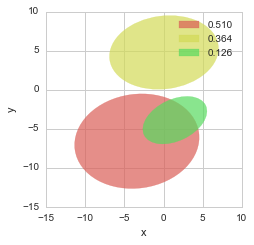

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.012      0.025  5.818295e-09      0.022       0.119

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.013      0.025  5.730019e-09      0.022       0.118

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.787  -2.897  -2.732  7.558  8.415  0.148
2  0.123   1.819  -4.132  4.207  3.255  0.369
3  0.090   3.194   5.263  4.401  3.310  0.027

GMM Plot Result
0.787257808749 [[-2.89692703 -2.73170401]] [ 7.23214057  8.69604301] 152.971443188
0.123075964493 [[ 1.81885845 -4.13226853]] [ 2.82310706  4.50843182] -62.5648394813
0.0896662267584 [[ 3.19444207  5.26344197]] [ 3.30666762  4.40353638] -87.296422871


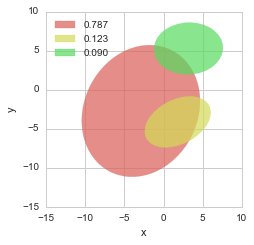

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.011      0.011  5.798832e-09      0.022       0.119

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.010      0.010  5.455937e-09      0.021       0.115

weight  mean_x  mean_y  sig_x  sig_y   corr
1  0.537  -3.561  -6.441  7.740  6.089  0.056
2  0.357   0.455   4.717  6.971  4.710  0.042
3  0.106   1.735  -3.706  3.600  2.839  0.261

GMM Plot Result
0.536583040201 [[-3.56107328 -6.44136399]] [ 6.06382031  7.75926989] -83.4612418397
0.357474074339 [[ 0.45528204  4.71687202]] [ 4.70228757  6.97623136] -87.0445876471
0.10594288546 [[ 1.73542336 -3.70575818]] [ 2.6241944   3.76015483] -66.2582678151


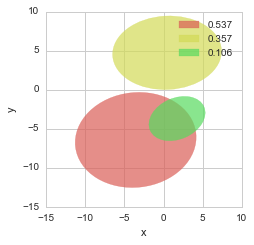

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.989  0.013      0.023  5.949108e-09      0.022       0.120

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.014      0.024  5.788706e-09      0.022       0.119


CPU times: user 3.42 s, sys: 183 ms, total: 3.6 s
Wall time: 27.5 s


In [68]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(10))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax)
    plt.show()
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print ''

## 6.2 Cross-validation, to select the number of Gaussian

In [69]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,7)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = zip(*CV_result)
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print 'Train'
    pretty_pd_display(CV_result_train)
    print 'Test'
    pretty_pd_display(CV_result_test)

Number of train/test dataset 32720.25 10906.75
  
Number of gaussian 1
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.027122  0.039212  2.998079e-08    0.050156     0.270216  0.945834
1    0.027203  0.040265  2.897118e-08    0.049724     0.265681  0.947684
2    0.028704  0.040300  2.949213e-08    0.049258     0.268055  0.947133
3    0.027976  0.041336  2.952485e-08    0.050195     0.268520  0.946196

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.033321  0.039921  2.853176e-08    0.049272     0.264067  0.948526
1    0.032148  0.044731  3.376764e-08    0.052269     0.287103  0.938978
2    0.029657  0.039922  3.251363e-08    0.053817     0.281736  0.940044
3    0.028649  0.037342  2.836057e-08    0.047666     0.262200  0.950120

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.020416  0.027312  1.019542e-08    0.028849     0.157665  0.981535
1    0.022538  0.029393  1.048979e-08    0.030028     0.159963  0.981042
2    0.021403  0.027840  1.062905e-08    0.030122     0.160880  0.980765
3    0.023589  0.028974  1.166341e-08    0.031291     0.168619  0.979014

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.028763  0.033561  1.421166e-08    0.036159     0.186057  0.974564
1    0.023869  0.026765  1.298024e-08    0.032071     0.177685  0.976610
2    0.026011  0.030378  1.226864e-08    0.031495     0.173201  0.977967
3    0.020385  0.023329  9.679339e-09    0.028610     0.153588  0.982328

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.023684  0.014735  5.513552e-09    0.021252     0.116015  0.990014
1    0.023523  0.013753  5.500896e-09    0.021402     0.115840  0.990114
2    0.025343  0.013705  5.350290e-09    0.021496     0.114194  0.990287
3    0.026370  0.013516  5.927941e-09    0.022494     0.120082  0.989308

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.026303  0.012811  8.174039e-09    0.027371     0.140845  0.985378
1    0.029939  0.019817  7.353728e-09    0.025025     0.133736  0.986519
2    0.031118  0.015104  7.914736e-09    0.024875     0.138924  0.985925
3    0.024595  0.017413  6.137333e-09    0.022277     0.122698  0.988874

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.009812  0.015862  3.040639e-09    0.015842     0.086101  0.994521
1    0.010249  0.016514  3.007104e-09    0.015933     0.085622  0.994553
2    0.007747  0.015063  2.793391e-09    0.015325     0.082493  0.994959
3    0.022968  0.012595  2.393446e-09    0.014332     0.076391  0.995669

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.014611  0.017279  3.739754e-09    0.018240     0.095448  0.993196
1    0.011138  0.017292  4.177137e-09    0.018680     0.100885  0.992521
2    0.012850  0.016407  4.754020e-09    0.020053     0.107744  0.991389
3    0.027738  0.010977  5.647561e-09    0.021204     0.117288  0.989872

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.004033  0.007662  1.325483e-09    0.010583     0.056831  0.997593
1    0.013819  0.006201  1.896455e-09    0.012696     0.067992  0.996593
2    0.003951  0.008679  1.411245e-09    0.010933     0.058656  0.997450
3    0.011751  0.006133  1.961522e-09    0.012718     0.069154  0.996453

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.008020  0.009894  4.183033e-09    0.018609     0.101033  0.992571
1    0.017604  0.010249  3.358512e-09    0.016584     0.090478  0.993832
2    0.007161  0.008466  3.080048e-09    0.015915     0.086628  0.994444
3    0.014211  0.010006  3.641858e-09    0.017841     0.094192  0.993447

  
Number of gaussian 6
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.006865  0.002813  1.050953e-09    0.009479     0.050609  0.998101
1    0.005387  0.002916  9.700154e-10    0.009028     0.048642  0.998255
2    0.007971  0.003551  9.875654e-10    0.009082     0.049072  0.998208
3    0.006455  0.003102  9.765526e-10    0.009045     0.048771  0.998235

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.010387  0.008773  2.243203e-09    0.013438     0.073969  0.995951
1    0.011311  0.017214  3.469115e-09    0.017147     0.091869  0.993667
2    0.010372  0.012213  2.847794e-09    0.015673     0.083276  0.994925
3    0.008945  0.009422  2.852943e-09    0.015615     0.083488  0.994860

CPU times: user 2.28 s, sys: 463 ms, total: 2.75 s
Wall time: 1min 28s


In [70]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print 'Train gof mean, std'
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print 'Test gof mean, std'
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.027751  0.040278  2.949224e-08    0.049833     0.268118  0.946712
2    0.021986  0.028380  1.074442e-08    0.030072     0.161782  0.980589
3    0.024730  0.013927  5.573170e-09    0.021661     0.116533  0.989931
4    0.012694  0.015008  2.808645e-09    0.015358     0.082652  0.994925
5    0.008389  0.007168  1.648676e-09    0.011733     0.063158  0.997022
6    0.006670  0.003096  9.962717e-10    0.009159     0.049273  0.998200

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.030944  0.040479  3.079340e-08    0.050756     0.273776  0.944417
2    0.024757  0.028508  1.228497e-08    0.032084     0.172633  0.977867
3    0.027989  0.016287  7.394959e-09    0.024887     0.134051  0.986674
4    0.016584  0.015489  4.579618e-09    0.019544     0.105341  0.991745
5    0.011749  0.009654  3.565863e-09    0.017237     0.093083  0.993574
6    0.010254  0.011906  2.853264e-09    0.015468     0.083151  0.994851

R_square


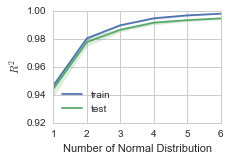

K_S


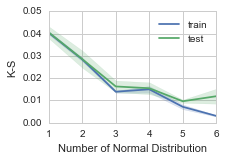

Chi_square


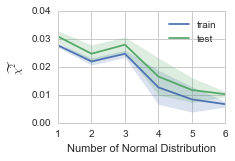

In [71]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print column
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Normal Distribution', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    plt.show()

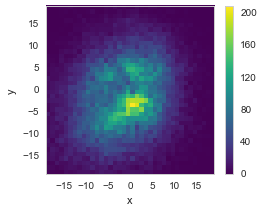

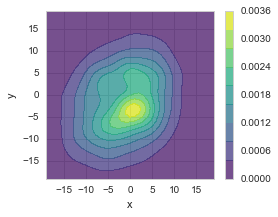

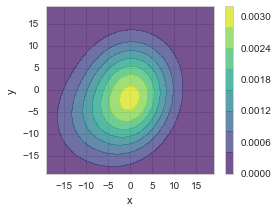

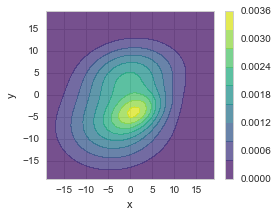

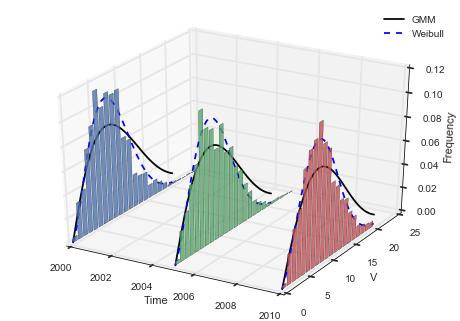

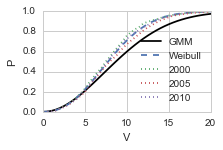

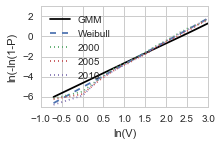

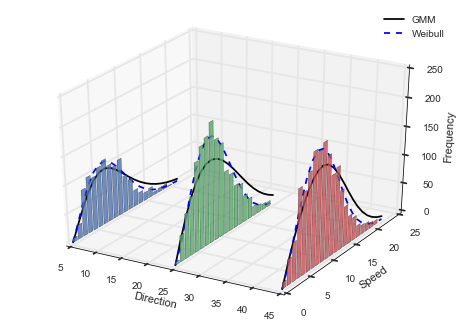

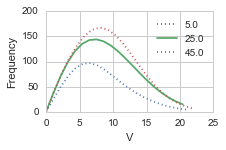

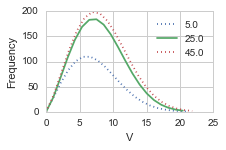

In [ ]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [ ]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(ipath)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 
output_HTML(current_file, output_file)